# Netflix Data : Cleaning, Analysing, Visualization and Recommendation

#  --------------------------------- Defining The Problem ----------------------------------

### 1. Clean, analyze, and visualize data.
### 2. Analyze content trends over time.
### 3. Use the processed data to build recommendation models.

# 1. Importing Libraries

In [671]:
import pandas as pd
import numpy as np
import pycountry
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
import datetime as dt
plt.rcParams['figure.dpi'] = 140
import os
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display
import plotly.figure_factory as ff
import plotly.express as px
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

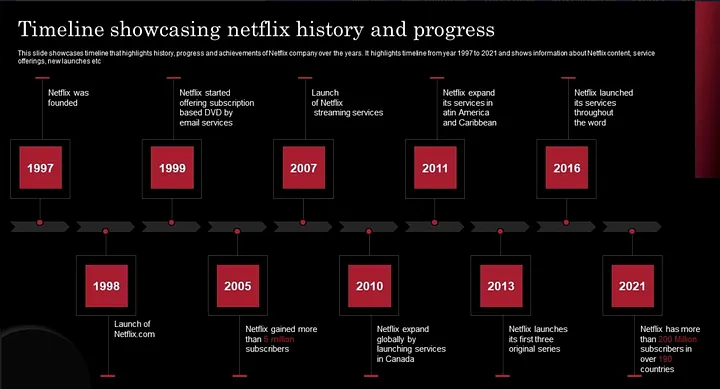

In [672]:
#Timeline representing history and progress of netflix
image_url = "https://miro.medium.com/v2/resize:fit:720/format:webp/1*4CvQ6jkNQxFOWMWyZXwVEQ.png"

try:
    # Fetch the image
    response = requests.get(image_url)
    response.raise_for_status()
    img = Image.open(BytesIO(response.content))
    display(img)

except requests.exceptions.HTTPError as err:
    print(f"HTTP error occurred: {err}")
except Exception as err:
    print(f"An error occurred: {err}")


# 2. Performing Exploratory Data Analysis

>2.1 Importing Dataset

In [673]:
os.chdir("E:\\UM_Project\\Netflix")
nf=pd.read_csv("netflix1.csv")

>2.2 Exploring Dataset

In [674]:
nf.head(3) #Dataview

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"


In [675]:
nf.columns #columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [676]:
for i in nf.columns:
    null_rate = nf[i].isna().sum() / len(nf) * 100
    print("{} null rate: {}%".format(i, round(null_rate, 2)))

show_id null rate: 0.0%
type null rate: 0.0%
title null rate: 0.0%
director null rate: 0.0%
country null rate: 0.0%
date_added null rate: 0.0%
release_year null rate: 0.0%
rating null rate: 0.0%
duration null rate: 0.0%
listed_in null rate: 0.0%


In [677]:
nf.info() #Datatype and null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


### We have to convert data type of date_released to datetime format.

In [678]:
# Convert 'date_added' to datetime format
nf['date_added'] = pd.to_datetime(nf['date_added'], errors='coerce')
print(nf['date_added'].dtype)

datetime64[ns]


>2.3 Removing duplicates and checking all possible value error in columns

In [679]:
# Checking for duplicate rows
num_duplicates = nf.duplicated().sum()  # Get the count of duplicate rows
duplicate_rows = nf[nf.duplicated()]    # Extract the actual duplicate rows

# Print results
print(f"Number of Duplicate Rows: {num_duplicates}")


Number of Duplicate Rows: 0


### No duplicate rows but lets check if our unique key that is 'show_id' holds different set of data with different id's ?

In [680]:
# Checking for duplicate cells in Show_id column
duplicates = nf.groupby('show_id').size()

# Show only duplicates (where count > 1)
duplicates = duplicates[duplicates > 1]
print("Duplicates and their counts:\n", duplicates)
print(nf['show_id'].dtype)

Duplicates and their counts:
 Series([], dtype: int64)
object


In [681]:
# Checking duplicate in title column
duplicates = nf.groupby('title').size()

# Show only duplicates (where count > 1)
duplicates = duplicates[duplicates > 1]
print("Duplicates and their counts:\n", duplicates)
print(nf['title'].dtype)

Duplicates and their counts:
 title
15-Aug    2
22-Jul    2
9-Feb     2
dtype: int64
object


### Title of the Movie/TV Show seems to be containing 'date' but they are actually the title of movies but are repeated, so lets check if other columns data also matches or not !

In [682]:
specific_values = ['15-Aug', '22-Jul', '9-Feb']
# Filter the DataFrame
filtered_rows = nf[nf['title'].isin(specific_values)]
print(filtered_rows)

     show_id     type   title            director   country date_added  \
393    s3997  TV Show   9-Feb           Not Given  Pakistan 2019-03-20   
537    s5965  TV Show   9-Feb           Not Given  Pakistan 2019-03-20   
2925   s3963    Movie  15-Aug  Swapnaneel Jayakar     India 2019-03-29   
3285   s4523    Movie  22-Jul     Paul Greengrass    Norway 2018-10-10   
4260   s5966    Movie  22-Jul     Paul Greengrass    Norway 2018-10-10   
4261   s5967    Movie  15-Aug  Swapnaneel Jayakar     India 2019-03-29   

      release_year rating  duration                             listed_in  
393           2018  TV-14  1 Season     International TV Shows, TV Dramas  
537           2018  TV-14  1 Season     International TV Shows, TV Dramas  
2925          2019  TV-14   124 min  Comedies, Dramas, Independent Movies  
3285          2018      R   144 min                     Dramas, Thrillers  
4260          2018      R   144 min                     Dramas, Thrillers  
4261          2019  TV-14

### Can see that different show_id contain same set of records, so have to drop the duplicates.

In [683]:
rows_to_drop = [393, 2925, 3285] 
# Drop the rows
nf = nf.drop(rows_to_drop)

In [684]:
# Checking for type
print(nf['type'].unique())

['Movie' 'TV Show']


### Lets check if the country column in reality contains the country name

In [685]:
names_array = nf['country'].unique()
names = names_array.tolist()

# Function to check if a name is a valid country or region
def check_country_or_region(name):
    
# Name is a string, then normalize it to lowercase
    if isinstance(name, str):
        normalized_name = name.lower()
    
# Check against countries
        for country in pycountry.countries:
            if normalized_name == country.name.lower() or normalized_name in (country.alpha_2.lower(), country.alpha_3.lower()):
                return True

# Check against subdivisions
        for subdivision in pycountry.subdivisions:
            if normalized_name == subdivision.name.lower():
                return True
    
    return False

# Collect and print only unrecognized names
unrecognized = [name for name in names if not check_country_or_region(name)]

print("Unrecognized countries or regions:", unrecognized)


Unrecognized countries or regions: ['Not Given', 'Taiwan', 'South Korea', 'Vietnam', 'Syria', 'Turkey', 'Czech Republic', 'Russia', 'Soviet Union', 'West Germany', 'Iran', 'Venezuela']


>Some countries are not recognized because this data includes information from 1925. Additionally, some country names have changed. For example, "South Korea" is officially known as the "Republic of Korea," "North Korea" is officially the "Democratic People's Republic of Korea," and "Taiwan" is officially referred to as "Taiwan, Province of China" according to ISO standards. "Russia" is now officially called the "Russian Federation," "Syria" is the "Syrian Arab Republic," and "Iran" is the "Islamic Republic of Iran." "Turkey" has been officially renamed "Türkiye," and "Czech Republic" is now officially "Czechia." The "Soviet Union" and "West Germany" no longer exist as they were dissolved or unified, respectively.

### Lets check whether the rating contains valid rating associated with netfix or not. 

In [686]:
print(nf['rating'].unique())

['PG-13' 'TV-MA' 'TV-PG' 'TV-14' 'TV-Y7' 'TV-Y' 'PG' 'TV-G' 'R' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']


 >>PG-13: Parents strongly cautioned; some material may be inappropriate for children under 13.  
 >>TV-MA: Mature audiences only; may contain explicit content not suitable for children under 17.                               
 >>TV-PG: Parental guidance suggested; some material may be inappropriate for younger children.                                 
 TV-14: Parents strongly cautioned; some material may be unsuitable for children under 14.                                     
 TV-Y7: Suitable for children age 7 and older; may contain mild fantasy or comedic elements.                                   
 TV-Y: Suitable for all children; contains nothing that would offend parents if viewed by children.                             
 PG: Parental guidance suggested; some material may not be suitable for children.                                               
 TV-G: General audience; suitable for all ages.                                                                                 
 R: Restricted; under 17 requires accompanying parent or adult guardian due to content.                                         
 G: General audiences; suitable for all ages.                                                                                   
 NC-17: No one 17 and under admitted; explicitly adult content.                                                                 
 NR: Not Rated; content has not been submitted for a rating or is not available.                                               
 TV-Y7-FV: Suitable for children age 7 and older; may contain mild fantasy violence.                                           
 UR: Unrated; content has not been officially rated by a rating organization.                                                   
 These ratings help viewers gauge the suitability of content based on age and sensitivity to certain themes.

In [687]:
# Filter rows where 'type' is 'TV Show' and get unique values of 'duration'
unique_durations = nf[nf['type'] == 'TV Show']['duration'].unique()
print(unique_durations)

['1 Season' '9 Seasons' '2 Seasons' '4 Seasons' '6 Seasons' '3 Seasons'
 '5 Seasons' '7 Seasons' '8 Seasons' '15 Seasons' '10 Seasons'
 '17 Seasons' '13 Seasons' '12 Seasons' '11 Seasons']


In [688]:
# Filter rows where 'type' is 'TV Show' and get unique values of 'duration'
unique_durations = nf[nf['type'] == 'Movie']['duration'].unique()
print(unique_durations)

['90 min' '91 min' '125 min' '104 min' '87 min' '127 min' '76 min'
 '71 min' '131 min' '39 min' '36 min' '34 min' '35 min' '46 min' '67 min'
 '65 min' '61 min' '166 min' '103 min' '97 min' '106 min' '147 min'
 '94 min' '161 min' '111 min' '110 min' '105 min' '96 min' '124 min'
 '116 min' '98 min' '115 min' '122 min' '55 min' '99 min' '88 min'
 '100 min' '23 min' '102 min' '93 min' '95 min' '85 min' '83 min'
 '182 min' '92 min' '84 min' '48 min' '145 min' '119 min' '80 min'
 '128 min' '143 min' '273 min' '117 min' '114 min' '118 min' '108 min'
 '37 min' '121 min' '63 min' '142 min' '113 min' '154 min' '120 min'
 '82 min' '109 min' '101 min' '86 min' '77 min' '229 min' '15 min'
 '89 min' '156 min' '112 min' '107 min' '129 min' '44 min' '68 min'
 '135 min' '136 min' '165 min' '150 min' '133 min' '47 min' '70 min'
 '56 min' '58 min' '78 min' '140 min' '64 min' '59 min' '60 min' '69 min'
 '19 min' '22 min' '148 min' '189 min' '54 min' '141 min' '130 min'
 '81 min' '138 min' '132 min' '123 m

### We can see that TV Shows contains number of seasons in duration while the Movies contain duration of movies in minutes.

# 3. Visualization

In [689]:
nf.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


### Movie and TV Show distribution

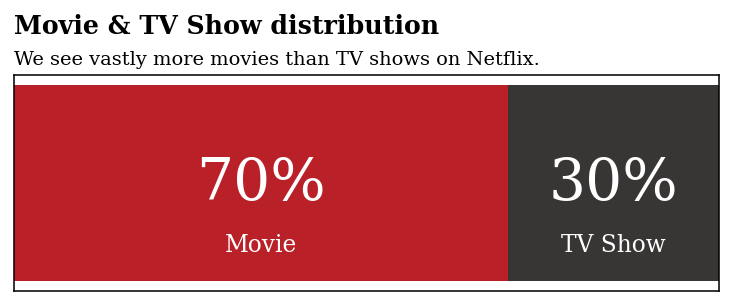

In [690]:
x=nf.groupby(['type'])['type'].count()
y=len(nf)
r=((x/y)).round(2)

nf_ratio = pd.DataFrame(r).T

fig, ax = plt.subplots(1,1,figsize=(6.5, 2.0))

ax.barh(nf_ratio.index, nf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(nf_ratio.index, nf_ratio['TV Show'], left=nf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# movie percentage
for i in nf_ratio.index:
    ax.annotate(f"{int(nf_ratio['Movie'][i]*100)}%", 
                   xy=(nf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=30, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie", 
                   xy=(nf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    for i in nf_ratio.index:
        ax.annotate(f"{int(nf_ratio['TV Show'][i]*100)}%", 
                   xy=(nf_ratio['Movie'][i]+nf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=30, fontweight='light', fontfamily='serif',
                   color='white')
        ax.annotate("TV Show", 
                   xy=(nf_ratio['Movie'][i]+nf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
# Title & Subtitle
fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=13, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=10)  
plt.show()

>>Netflix's catalog is significantly weighted towards movies, with a majority of its offerings (70%) being films, while TV shows make up a smaller portion (30%). This suggests that Netflix users have more movies to choose from than TV series.

### Top 10 Countries on Netflix by their content capture ratio

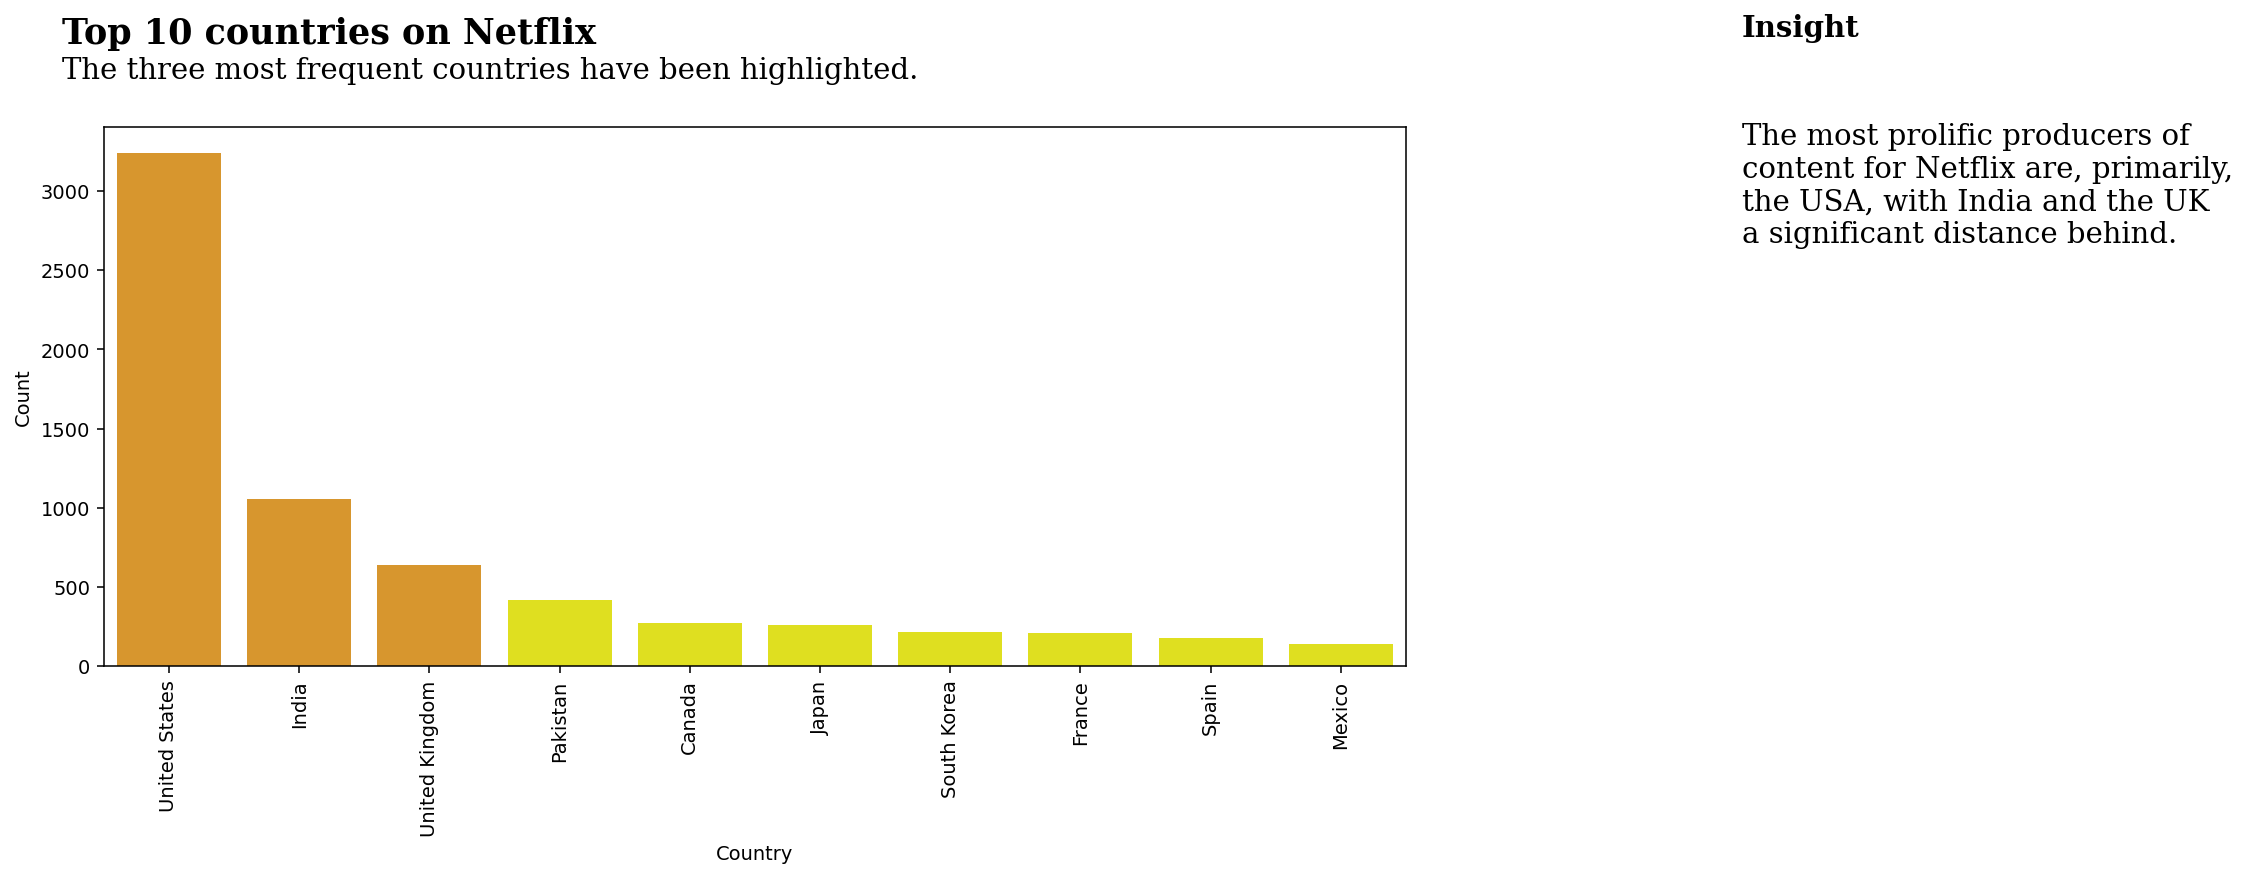

In [691]:
# Count occurrences of each country
country_counts = nf['country'].value_counts()

# Exclude the specific country which is not assigned
country_counts = country_counts[country_counts.index != 'Not Given']

top_countries = country_counts.head(10).index

# Filter DataFrame to include only the top 10 countries
nf_top_10 = nf[nf['country'].isin(top_countries)]

# Define the color map: highlight top 3 countries with '#b20710', others with '#f5f5f1'
color_map = ['#ffff00' for _ in range(len(top_countries))]
color_map[:3] = ['#f39c12'] * 3

# Create a color map dictionary to map countries to colors
color_dict = dict(zip(top_countries, color_map))

# Plotting
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x='country', data=nf_top_10, order=top_countries, palette=color_dict, ax=ax)
fig.text(0.10, 1, 'Top 10 countries on Netflix', fontsize=18, fontweight='bold', fontfamily='serif')
fig.text(0.10, 0.95, 'The three most frequent countries have been highlighted.', fontsize=15, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.67, '''
The most prolific producers of
content for Netflix are, primarily,
the USA, with India and the UK
a significant distance behind.
''', fontsize=15, fontweight='light', fontfamily='serif')
ax.set_xlabel('Country')
ax.set_ylabel('Count')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()


>>Dominance of the USA: The United States leads significantly with over 3,000 content pieces, showcasing its dominance as the most prolific content producer for Netflix.                                                                                                                                                                        
India and the UK: These two countries follow, but at a much lower scale compared to the US. India has around 1,000 entries, and the UK slightly fewer than 500.                                                                                                 
Other Countries: Pakistan, Canada, Japan, South Korea, France, Spain, and Mexico also contribute, but in much smaller quantities (all below 500).                                                                                                               
Insight: The USA is the clear leader, while India and the UK are significant but distant contributors. The other countries lag far behind, indicating a concentrated production effort from a few major players.

## Top 10 Countries Movies and TV Showes split

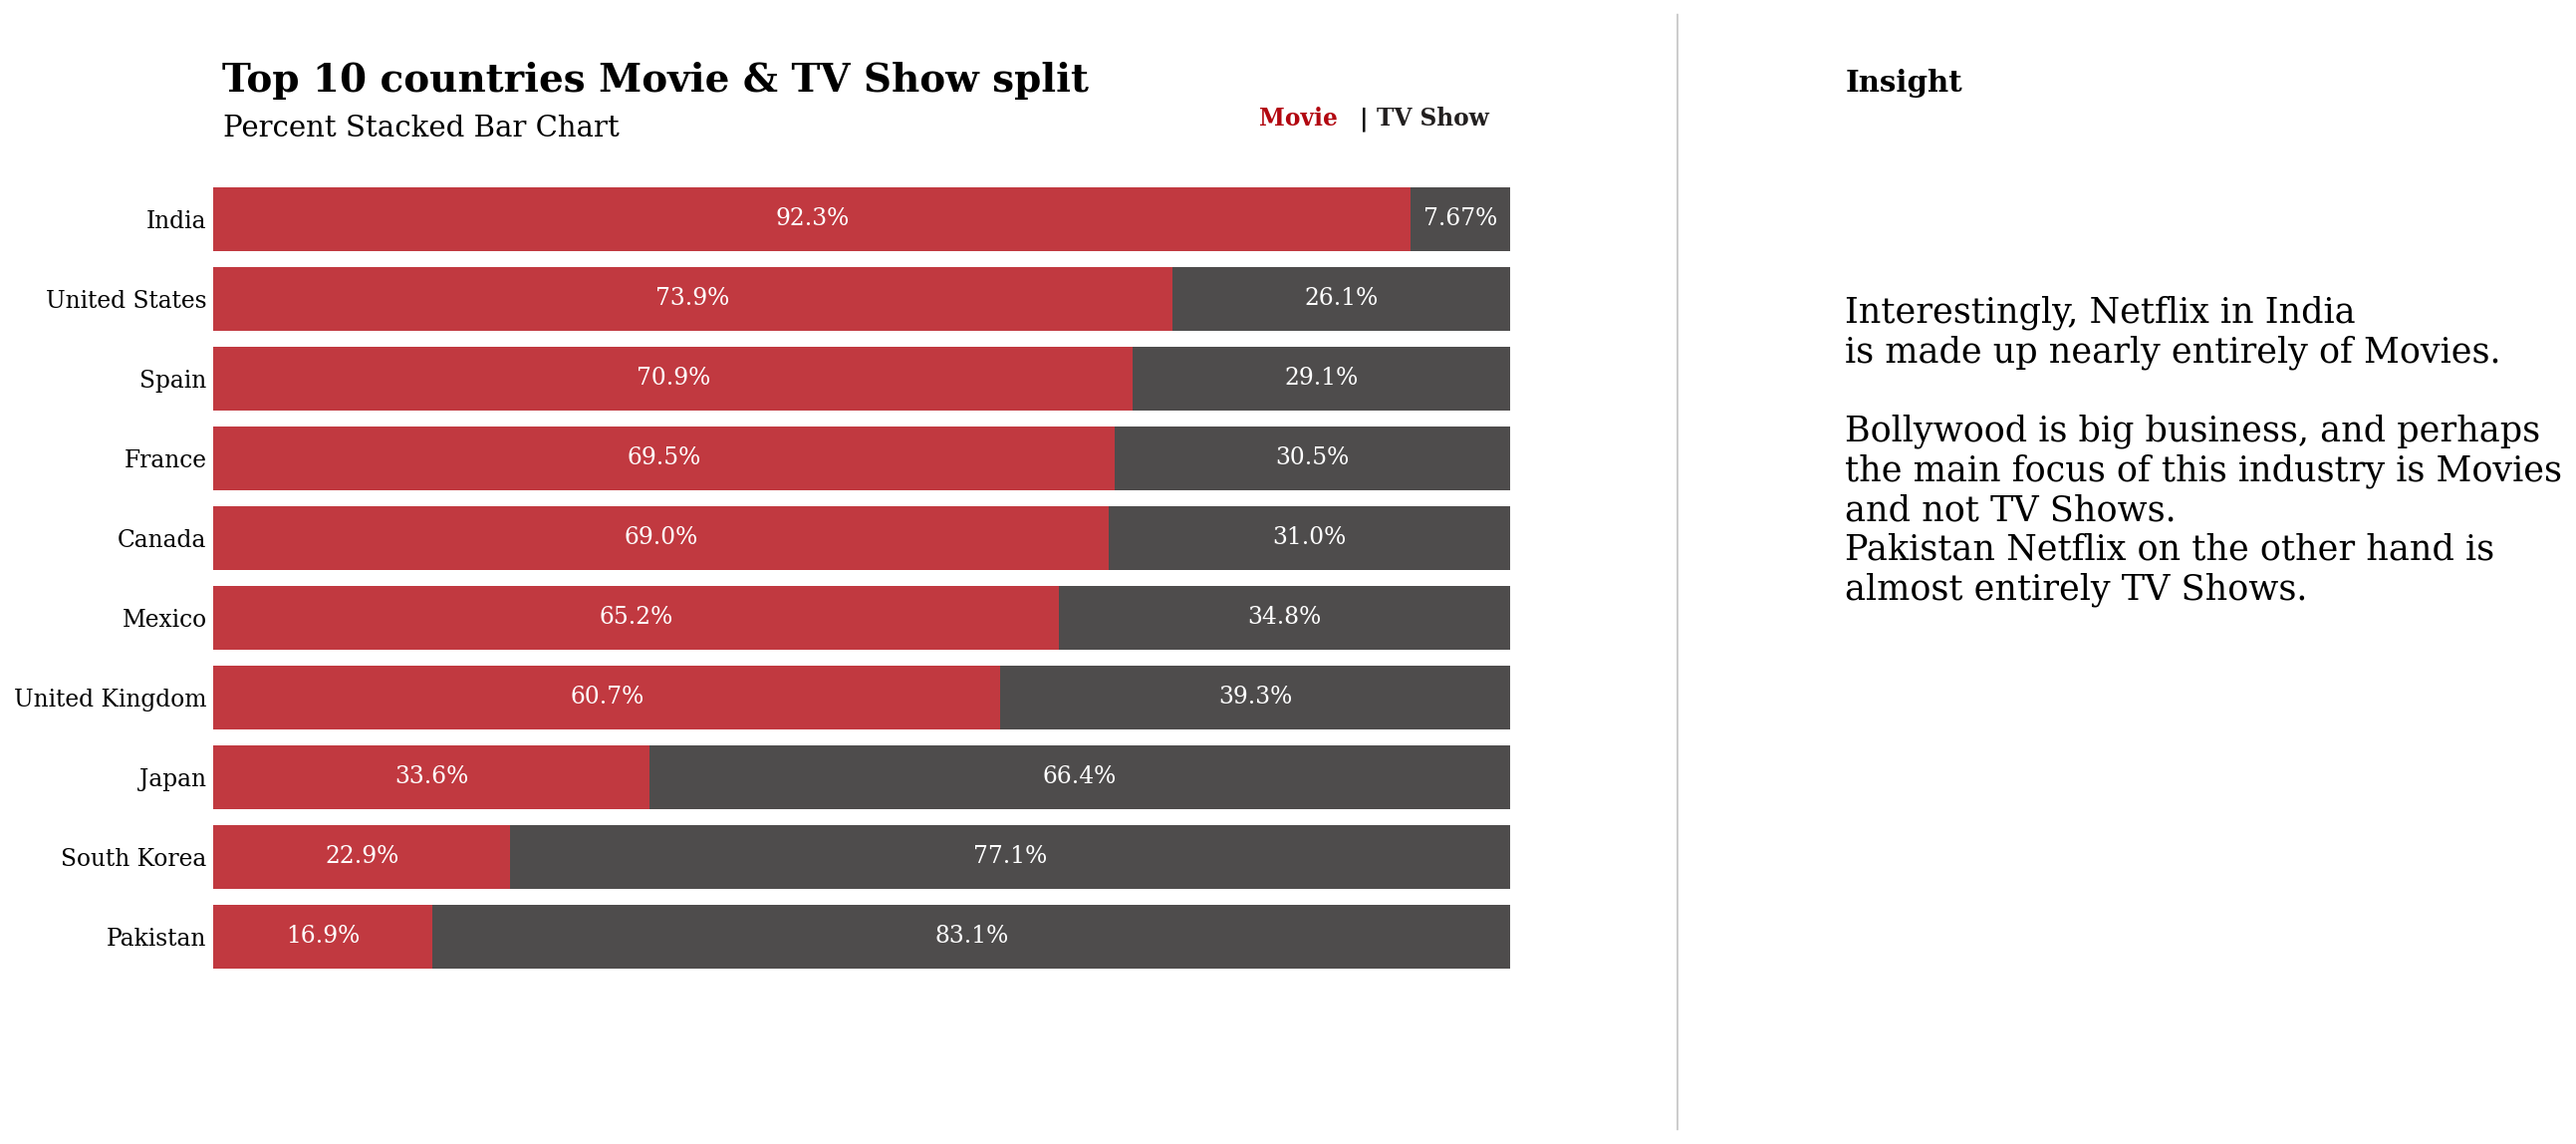

In [692]:
filtered_nf = nf[nf['country'] != 'Not Given']
country_order = filtered_nf['country'].value_counts()[:10].index

# Group by 'country' and calculate value counts for 'type'
data_q2q3 = filtered_nf[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]

data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

###
fig, ax = plt.subplots(1,1,figsize=(12, 8),)
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=20, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=15,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=12, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')


fig.text(1.1, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.44, '''
Interestingly, Netflix in India
is made up nearly entirely of Movies. 

Bollywood is big business, and perhaps
the main focus of this industry is Movies
and not TV Shows.
Pakistan Netflix on the other hand is 
almost entirely TV Shows.
'''
         , fontsize=18, fontweight='light', fontfamily='serif')



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

>>Here are the key outcomes:                                                                                                   
India: Dominated by movies (92.3%), with a very small proportion of TV shows (7.67%). This reflects the prominence of Bollywood and the heavy focus on films rather than TV content.                                                                           
United States: Though movies lead at 73.9%, there's a significant portion of TV shows (26.1%) compared to other countries.     
Pakistan: The reverse of India, with an overwhelming majority of TV shows (83.1%) and only 16.9% movies, marking it as a country where Netflix is more TV-focused.                                                                                               
Other Countries:                                                                                                               
Spain, France, Canada, and Mexico have around 65-70% of their content as movies.                                               
The UK shows a more balanced split, with about 60.7% movies and 39.3% TV shows.                                                 
Japan and South Korea are more TV show-heavy, particularly South Korea with 77.1% TV shows.                                     

## Rating distribution by Movies & TV Shows

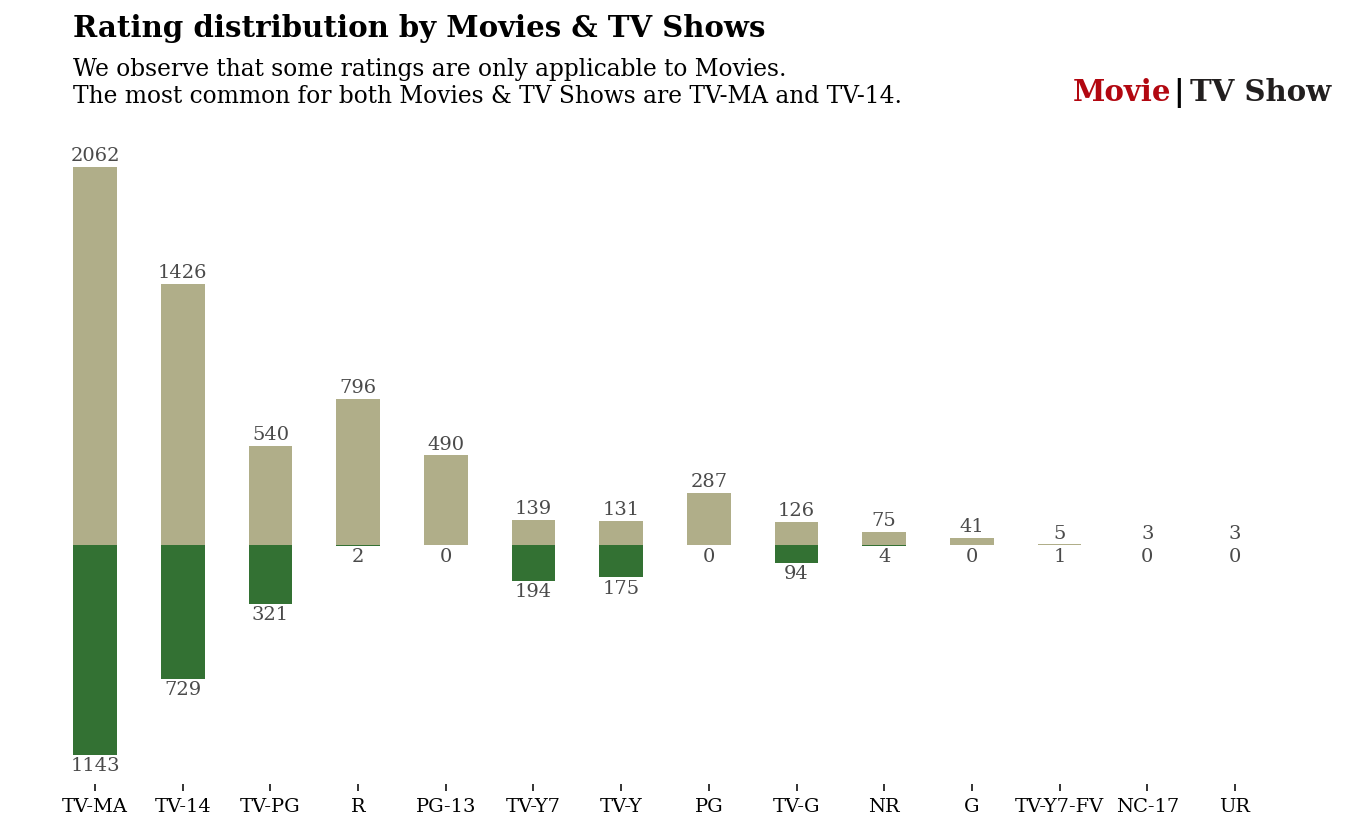

In [693]:
order = nf.groupby('rating').size().sort_values(ascending=False).reset_index(name='count')
rating_order = list(order['rating'])
mf = nf.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='#9c9a6c', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#004d00', alpha=0.8, label='TV Show')

for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')   
for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])    
ax.legend().set_visible(False)
fig.text(0.16, 1, 'Rating distribution by Movies & TV Shows', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.89, 
'''We observe that some ratings are only applicable to Movies. 
The most common for both Movies & TV Shows are TV-MA and TV-14.
'''

, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()

>>The most common ratings for both movies and TV shows on Netflix are TV-MA and TV-14, suggesting a strong presence of mature content. Movie ratings like R and PG-13 are significant, while TV shows have more kid-friendly ratings like TV-Y and TV-Y7, which are not found in movies.

## Numbers of Release per year on netflix

In [694]:
# Calculate the value counts of release years
release_year_counts = nf['release_year'].value_counts().sort_index()

# Convert to DataFrame for plotly.express
release_year_df = release_year_counts.reset_index()
release_year_df.columns = ['Release Year', 'Count']

fig = px.area(release_year_df, x='Release Year', y='Count', title='Number of Releases per Year')
fig.show()

## Movies and TV Showes added over Years

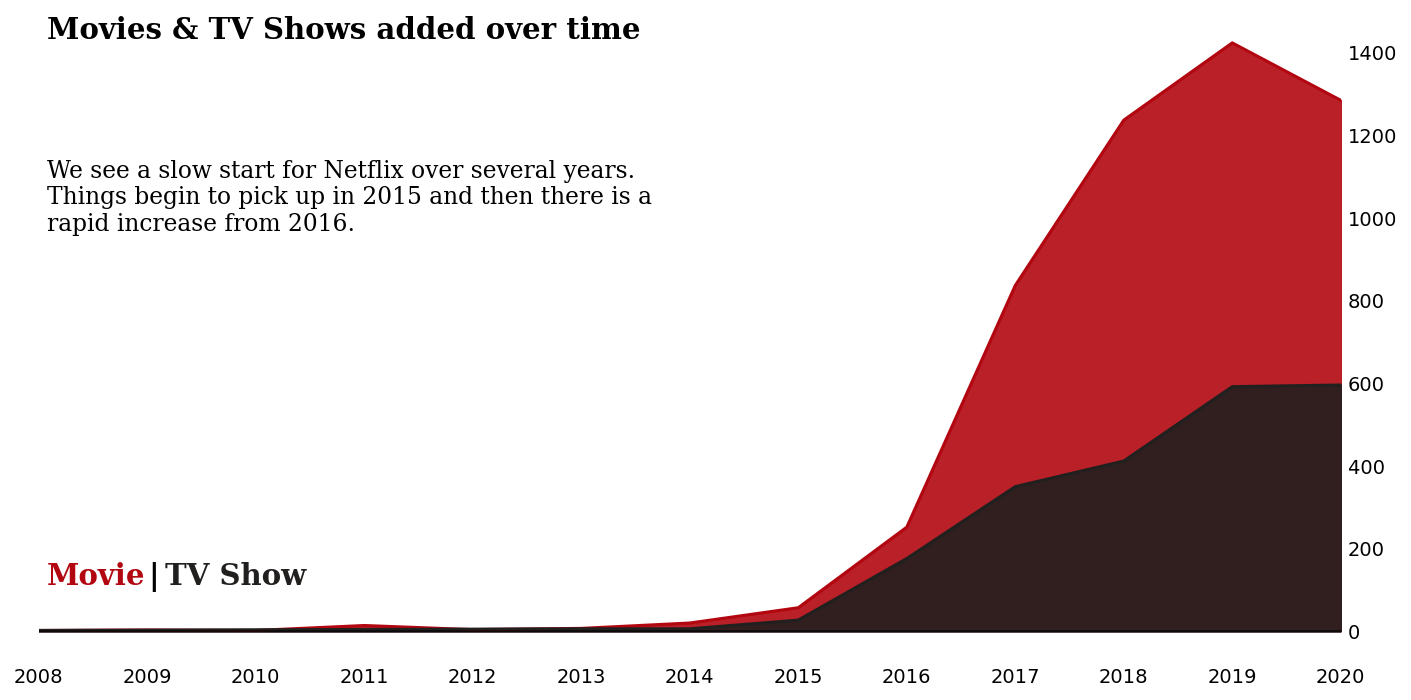

In [695]:
nf['year_added'] = nf['date_added'].dt.year

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(nf['type'].value_counts().index):
    mtv_rel = nf[nf['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)    
ax.yaxis.tick_right()
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)
ax.grid(False)
ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.59, 
'''We see a slow start for Netflix over several years. 
Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.
'''

, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)
plt.show()

>>Here are some key observations:                                                                                               
Slow Growth (2008–2014): Netflix had a minimal number of additions during these early years, with very little increase in content.                                                                                                                       
Steady Growth (2015): There was a noticeable rise in content added in 2015, marking a shift in Netflix's content strategy.     
Rapid Growth (2016–2019): After 2015, Netflix significantly ramped up its content, with a sharp increase, particularly in movies (shown in red). This rapid expansion continued until 2019.                                                                     
Decline in 2020: The number of additions appears to drop slightly in 2020 after reaching a peak in 2019.

## Movies & TV Shows added over time (Monthly)

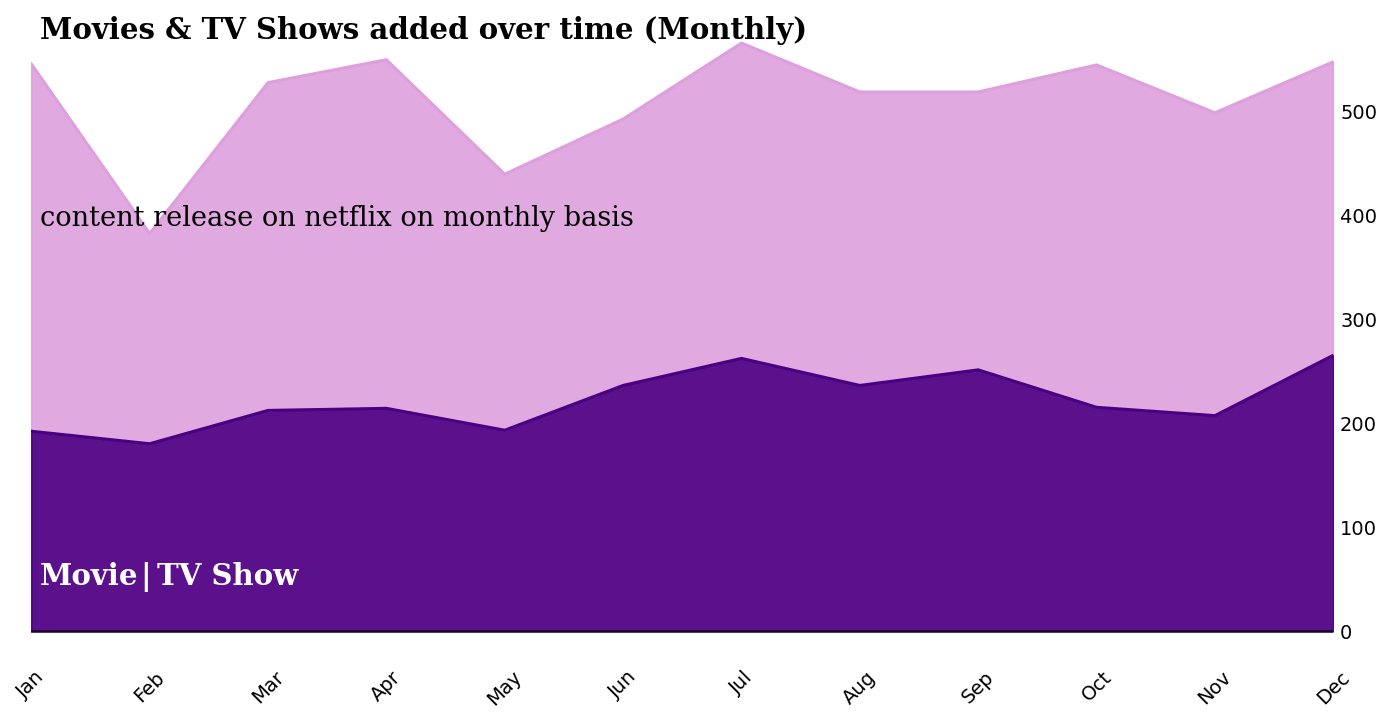

In [696]:
nf['date_added'] = pd.to_datetime(nf['date_added'], format='%m/%d/%Y')

nf['month'] = nf['date_added'].dt.strftime('%b')

# Aggregate monthly data
monthly_data = nf.groupby(['month', 'type']).size().unstack().fillna(0)

# Reorder months to ensure they are in calendar order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_data = monthly_data.reindex(month_order)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#dda0dd", "#4b0082"]

for i, mtv in enumerate(monthly_data.columns):
    mtv_rel = monthly_data[mtv]
    ax.plot(monthly_data.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(monthly_data.index, 0, mtv_rel, color=color[i], alpha=0.9)
ax.yaxis.tick_right()
ax.axhline(y=0, color='black', linewidth=1.3, alpha=0.7)

# Set x-axis to show only month names
ax.set_xlim('Jan', 'Dec')
plt.xticks(rotation=45)

# Formatting
for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)
ax.grid(False)
fig.text(0.13, 0.85, 'Movies & TV Shows added over time (Monthly)', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.59, 
'''content release on netflix on monthly basis
''',
fontsize=14, fontweight='light', fontfamily='serif')

fig.text(0.13, 0.2, "Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='white')
fig.text(0.19, 0.2, "|", fontweight="bold", fontfamily='serif', fontsize=15, color='white')
fig.text(0.2, 0.2, "TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='white')

ax.tick_params(axis='both', which='both', length=0)

plt.show()


>> Key observations:                                                                                                           
Minimal Variation: The chart shows that there is no significant variation in the content released on Netflix from month to month. Both movies (in a lighter color) and TV shows (in a darker color) are added relatively consistently throughout the year.                                                                                                                              Steady Content Release: While there are minor peaks in some months, like May and October, the overall trend appears stable, with no large fluctuations.

## Average duration of Movies in 2 year interval

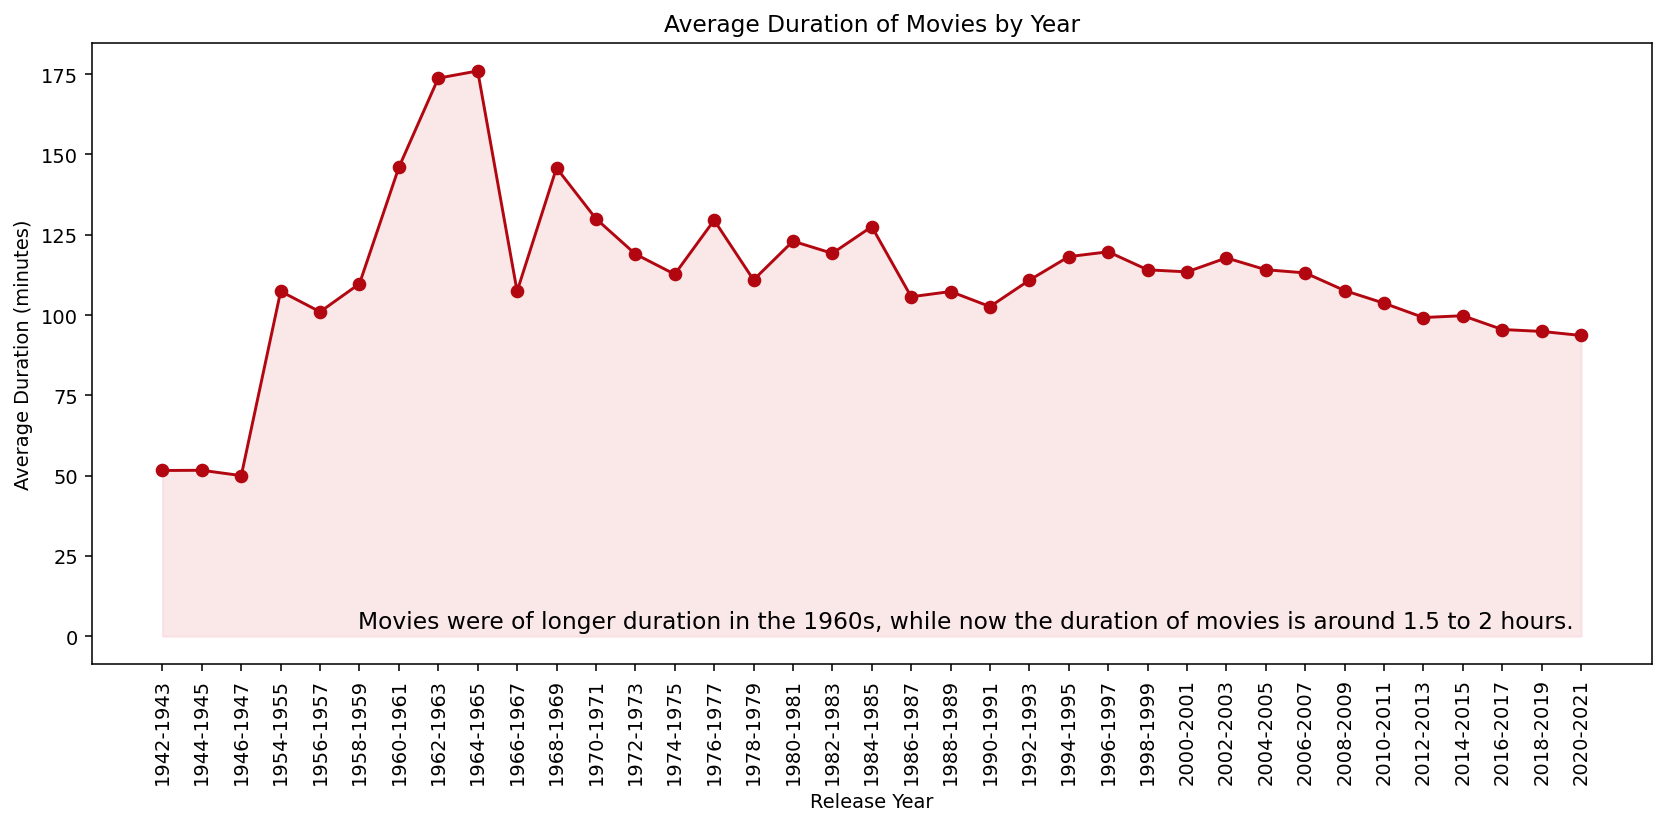

In [697]:
def get_2_year_interval(year):
    start_year = (year // 2) * 2
    end_year = start_year + 1
    return f"{start_year}-{end_year}"
plt.figure(figsize=(12, 6))

# Apply function to create a new column for 2-year intervals
nf['2_year_interval'] = nf['release_year'].apply(get_2_year_interval)

filtered_nf = nf[nf['type'] != 'TV Show']

filtered_nf['duration'] = filtered_nf['duration'].str.extract(r'(\d+)').astype(float)

average_seasons = filtered_nf.groupby('2_year_interval')['duration'].mean().reset_index()

plt.plot(average_duration['2_year_interval'], average_duration['duration'], marker='o', color='#b20710')

plt.fill_between(
    average_duration['2_year_interval'],
    average_duration['duration'],
    color='#f8d7da',
    alpha=0.6
)
plt.title('Average Duration of Movies by Year')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.text(
    x=0.95, y=0.05,
    s="Movies were of longer duration in the 1960s, while now the duration of movies is around 1.5 to 2 hours.",
    ha='right', va='bottom', fontsize=12, color='black', transform=plt.gca().transAxes
)
plt.grid(False)
plt.xticks(average_duration['2_year_interval'])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Distribution of Movies length

In [698]:
filtered_nf = nf[nf['type'] != 'TV Show']
x1 = filtered_nf['duration']
x1 = x1.str.replace(' min', '').astype(int)
fig = ff.create_distplot([x1], ['a'], bin_size=0.9, colors=["#6ad49b"])
fig.update_layout(title_text= 'Distribution of Movies duration')
fig.show()

## Count of TV Show Seasons

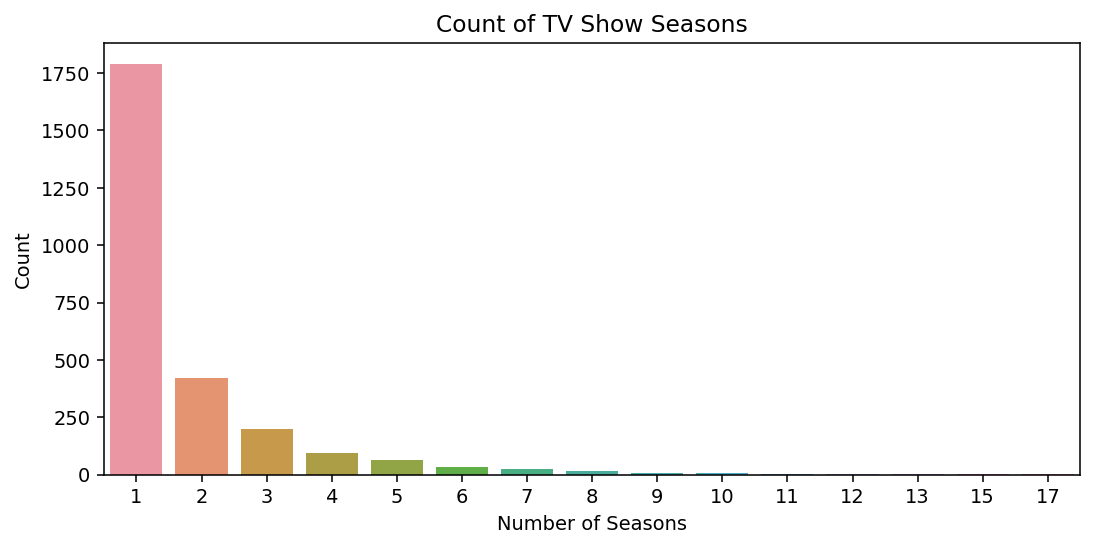

In [699]:
filtered_nf = nf[nf['type'] != 'Movie']

filtered_nf['Number of Seasons'] = filtered_nf['duration'].str.extract(r'(\d+)').astype(int)
fig, ax=plt.subplots(figsize=(9,4))
sns.countplot(x='Number of Seasons', data=filtered_nf)
ax.set_title('Count of TV Show Seasons')
ax.set_xlabel('Number of Seasons')
ax.set_ylabel('Count')
plt.show()


>>Key observations:                                                                                                             
Dominance of Single-Season Shows: The vast majority of TV shows on Netflix have only 1 season, with a count exceeding 1,750.   
Sharp Decline After 1 Season: There is a steep drop-off in the number of shows with 2 or more seasons. The count for 2-season shows is significantly lower, followed by an even more drastic decrease as the number of seasons increases.                     
Few Long-Running Shows: Very few TV shows have more than 6 seasons. There are sparse occurrences of shows with 7, 8, or more seasons, indicating that long-running series are quite rare.                                                                   
This suggests that most of Netflix's TV content consists of single-season shows, possibly including limited series or recently launched series.

## Average Seasons of TV Shows released

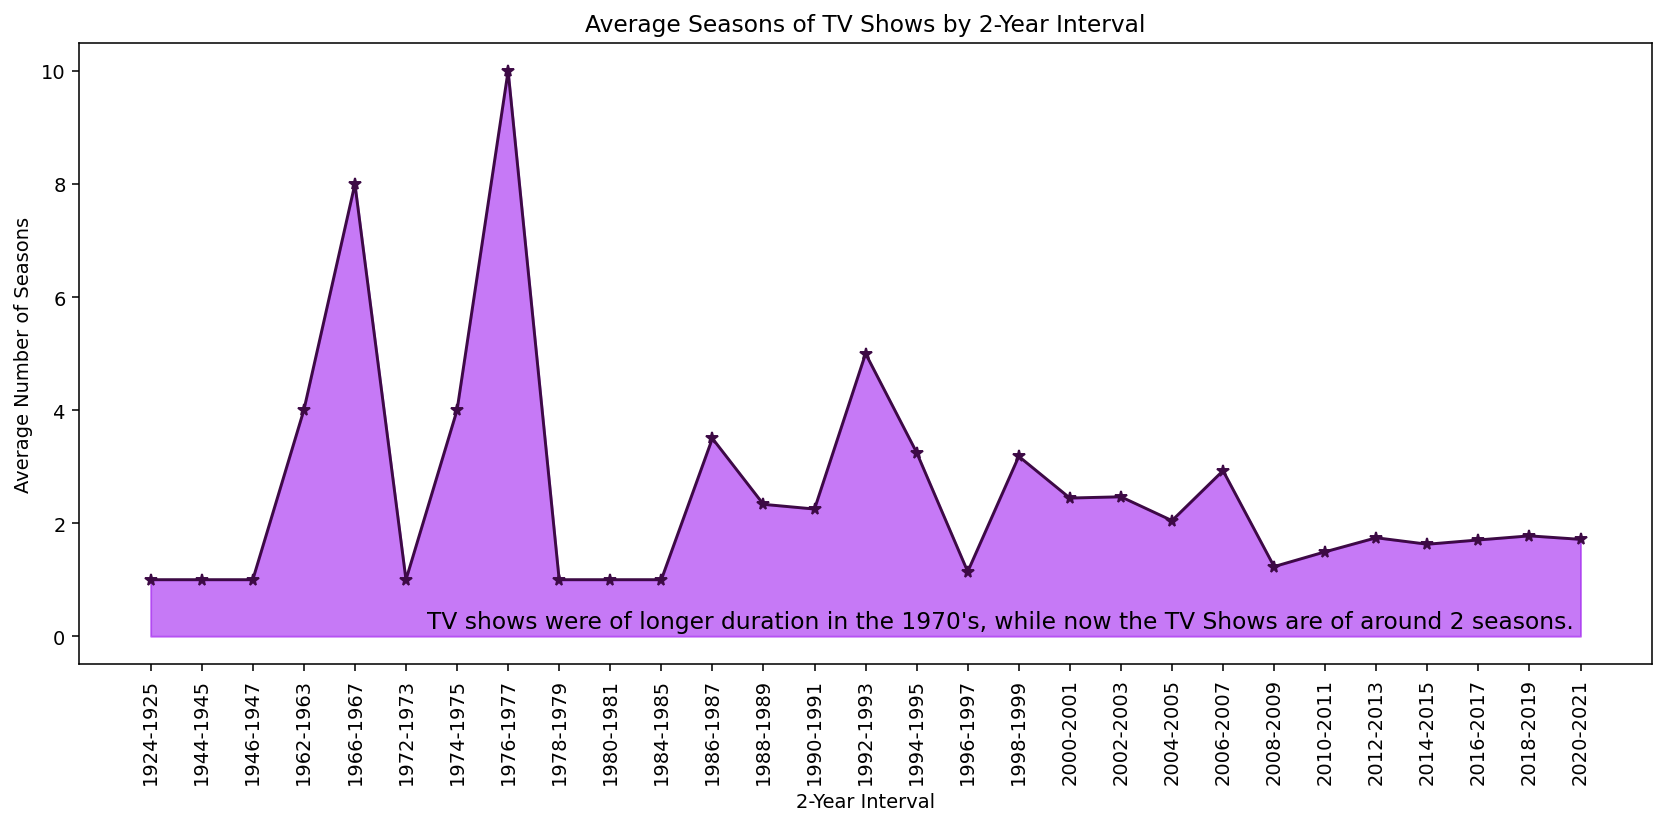

In [700]:
def get_2_year_interval(year):
    start_year = (year // 2) * 2
    end_year = start_year + 1
    return f"{start_year}-{end_year}"

# Apply function to create a new column for 2-year intervals
nf['2_year_interval'] = nf['release_year'].apply(get_2_year_interval)

filtered_nf = nf[nf['type'] != 'Movie']

filtered_nf['Number of Seasons'] = filtered_nf['duration'].str.extract(r'(\d+)').astype(float)

average_seasons = filtered_nf.groupby('2_year_interval')['Number of Seasons'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(average_seasons['2_year_interval'], average_seasons['Number of Seasons'], marker='*', color='#3d0a45')
plt.fill_between(
    average_seasons['2_year_interval'],
    average_seasons['Number of Seasons'],
    color='#a020f0',
    alpha=0.6
)
plt.title('Average Seasons of TV Shows by 2-Year Interval')
plt.xlabel('2-Year Interval')
plt.ylabel('Average Number of Seasons')
plt.text(
    x=0.95, y=0.05,
    s="TV shows were of longer duration in the 1970's, while now the TV Shows are of around 2 seasons.",
    ha='right', va='bottom', fontsize=12, color='black', transform=plt.gca().transAxes
)
plt.grid(False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Heatmap to show correlation between different Genre in which Movies and TV Showes are listed

In [701]:
from sklearn.preprocessing import MultiLabelBinarizer 

import matplotlib.colors


# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#006400','#4CAF50','#a8d5ba','#d0f0c0','#FFA07A', '#FF8C00', '#FF5722', '#BF5700'])



def genre_heatmap(df, title):
    nf['genre'] = nf['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in nf['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = nf['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 10))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()
nf_tv = nf[nf["type"] == "TV Show"]
nf_movies = nf[nf["type"] == "Movie"]

There are 42 types in the Netflix TV Show Dataset


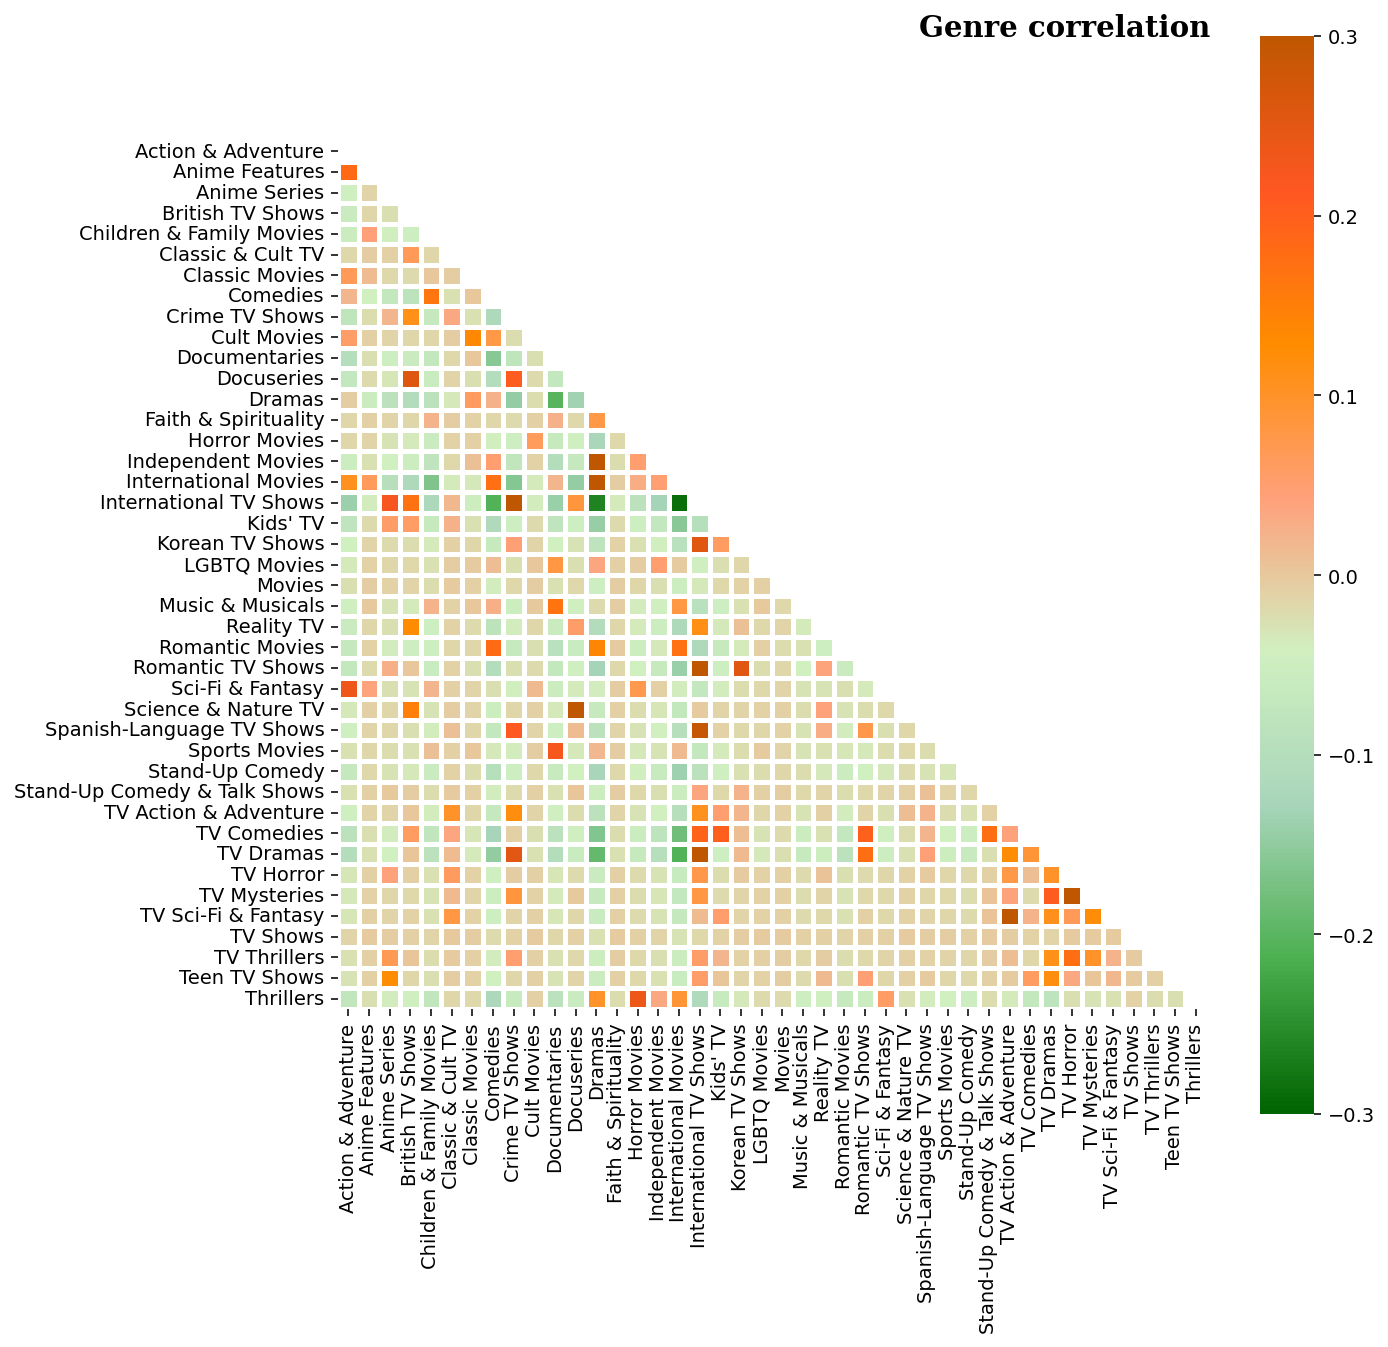

In [702]:
genre_heatmap(nf_tv, 'TV Show')
plt.show()

>>Key Observations:                                                                                                             
Positive Correlations:                                                                                                         
Anime Features have a strong positive correlation with Anime Series, suggesting they share similar characteristics.             
TV Dramas and TV Mysteries show a moderate positive correlation, indicating they might often be combined or have overlapping themes.                                                                                                                         
TV Comedies and Stand-Up Comedy & Talk Shows have a slight positive correlation, suggesting they might share some comedic elements or target similar audiences.                                                                                           
Negative Correlations:                                                                                                         
Anime Series and TV Mysteries have a moderate negative correlation, suggesting they might have distinct characteristics or target different audiences.                                                                                                     
TV Dramas and TV Thrillers have a slight negative correlation, indicating they might have contrasting tones or themes.         
Neutral Correlations:                                                                                                           
Most of the other genre pairs exhibit neutral correlations, suggesting they don't have strong associations with each other.

There are 42 types in the Netflix Movie Dataset


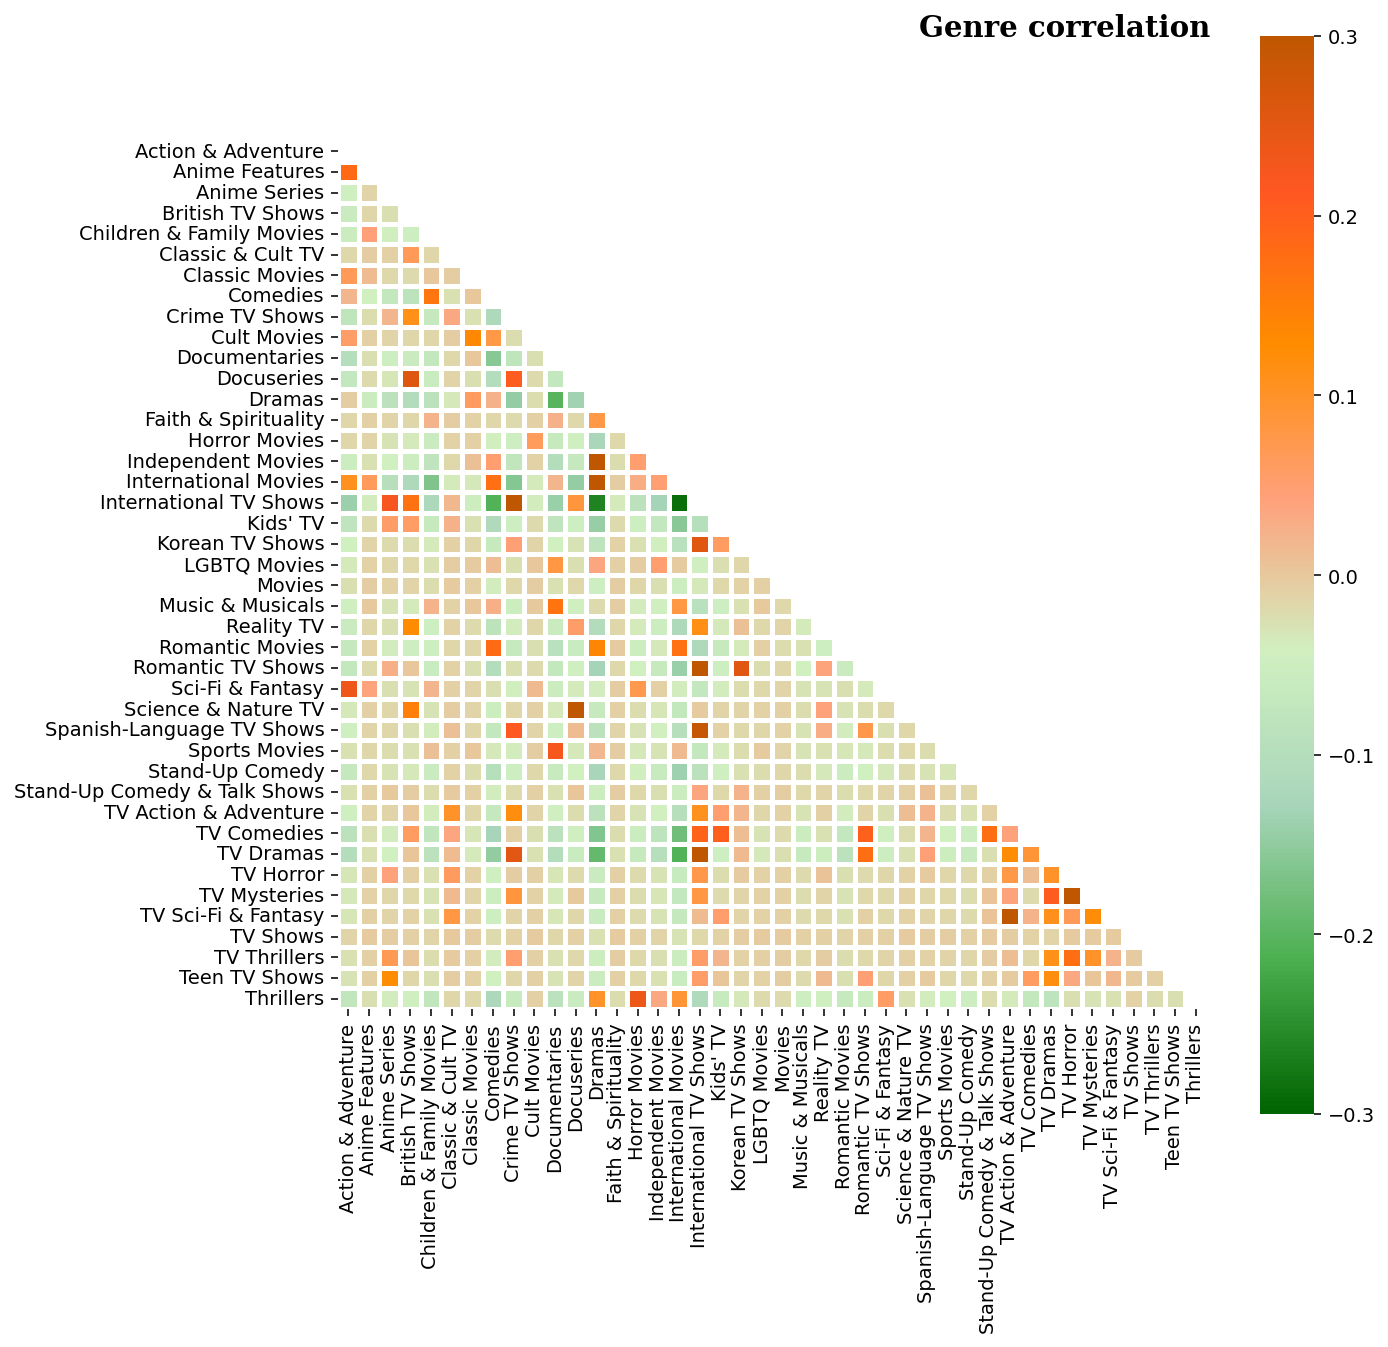

In [703]:
genre_heatmap(nf_movies, 'Movie')
plt.show()

>>Key Observations:                                                                                                             
Positive Correlations:                                                                                                         
Anime Features have a strong positive correlation with Anime Series, suggesting they share similar characteristics.             
TV Dramas and TV Mysteries show a moderate positive correlation, indicating they might often be combined or have overlapping themes.                                                                                                                         
TV Comedies and Stand-Up Comedy & Talk Shows have a slight positive correlation, suggesting they might share some comedic elements or target similar audiences.                                                                                           
Negative Correlations:                                                                                                         
Anime Series and TV Mysteries have a moderate negative correlation, suggesting they might have distinct characteristics or target different audiences.                                                                                                     
TV Dramas and TV Thrillers have a slight negative correlation, indicating they might have contrasting tones or themes.         
Neutral Correlations:                                                                                                           
Most of the other genre pairs exhibit neutral correlations, suggesting they don't have strong associations with each other.

## Top 10 Directors by Number of Titles

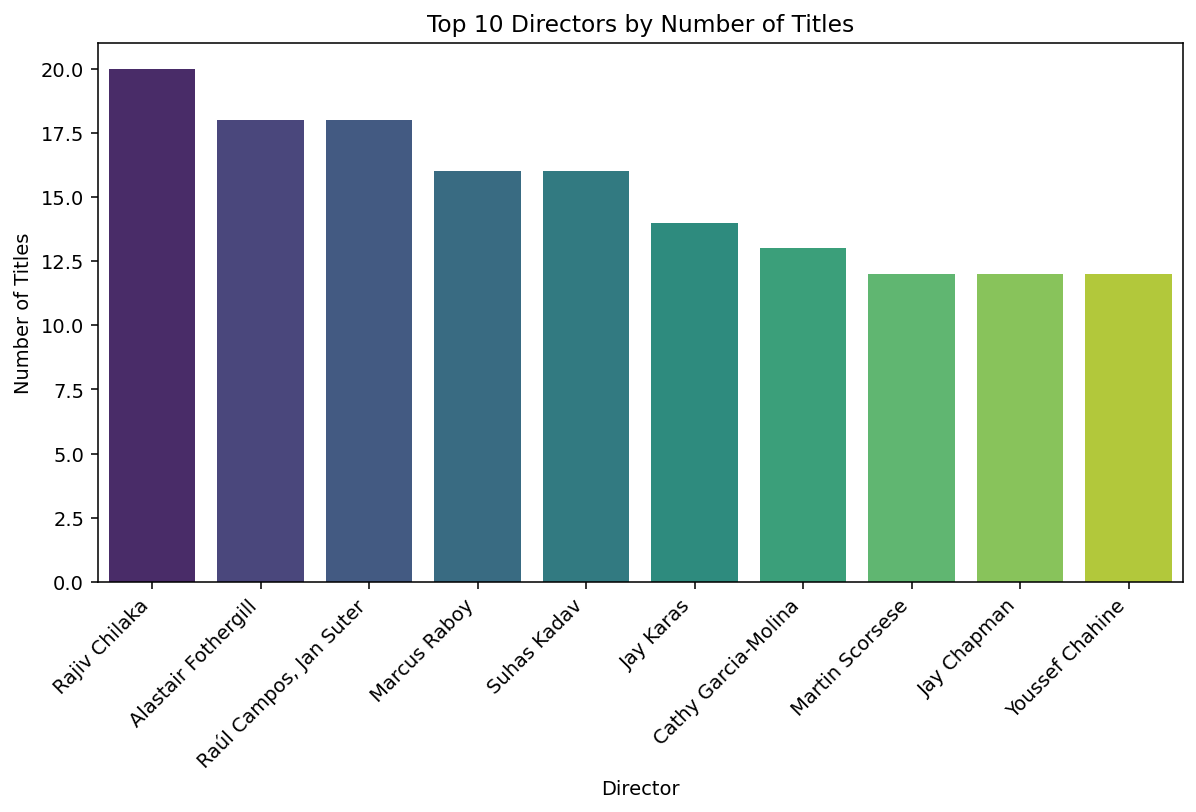

In [704]:
filtered_nf = nf[nf['director'] != 'Not Given']
top_directors = filtered_nf['director'].value_counts().head(10)

# Convert Series to DataFrame for plotting
top_directors_df = top_directors.reset_index()
top_directors_df.columns = ['director', 'count']

# Plot top directors
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='director', y='count', data=top_directors_df, palette='viridis')

# Formatting
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel('Director')
ax.set_ylabel('Number of Titles')
ax.set_title('Top 10 Directors by Number of Titles')

plt.show()


>>Key findings:                                                                                                                 
Rajiv Chilaka is the director with the most titles, followed by Alastair Fothergill and Raúl Campos, Jan Suter.                 
The number of titles directed by the top 10 directors ranges from approximately 12 to 20.                                       
The directors are from various countries, including India, the United Kingdom, and Spain.                                       
The chart does not provide information about the types of films or TV shows directed by the directors.

## Trend Analysis

## Lets check how the top genre varies in overall percentage of release in a lustrum

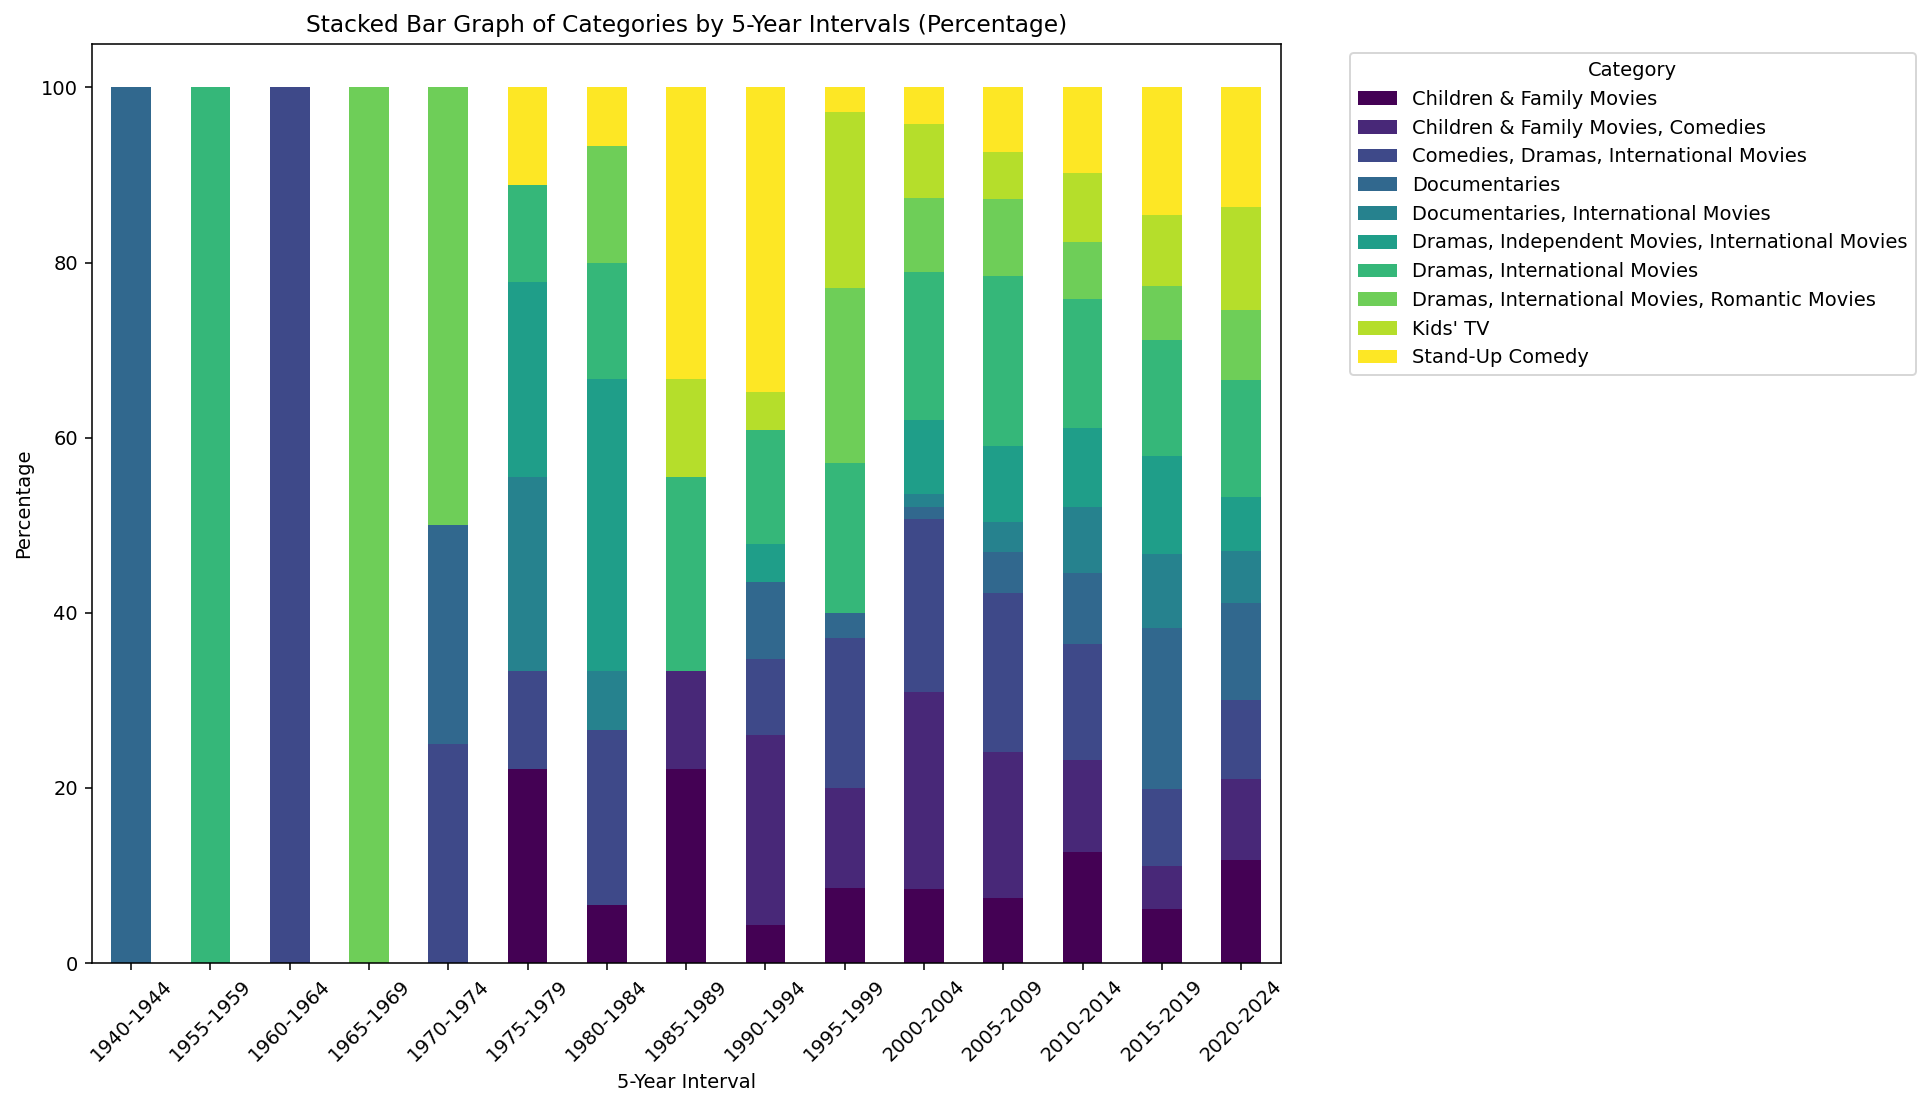

In [705]:
def get_5_year_interval(year):
    return f"{(year // 5) * 5}-{(year // 5) * 5 + 4}"

nf['5_year_interval'] = nf['release_year'].apply(get_5_year_interval)

# Get top 10 most frequent values in 'listed_in'
top_list = nf['listed_in'].value_counts().head(10).index

nf_filtered = nf[nf['listed_in'].isin(top_list)]

# Aggregate counts of categories by 5-year interval
category_counts = nf_filtered.groupby(['5_year_interval', 'listed_in']).size().unstack(fill_value=0)

# Calculate percentage of each category within each 5-year interval
category_percentages = category_counts.div(category_counts.sum(axis=1), axis=0) * 100

# Plotting
ax = category_percentages.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Stacked Bar Graph of Categories by 5-Year Intervals (Percentage)')
plt.xlabel('5-Year Interval')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


>> Here's an analysis of above graph                                                                                                         
1940-1974:
Early years (1940-1964) were primarily dominated by Children & Family Movies and Dramas, International Movies. This suggests a focus on more traditional forms of cinema, especially content geared towards families and general audiences.
The introduction of more categories, such as Comedies and International Movies, began to diversify after the 1950s.             
1975-1989:
A notable rise in Kids' TV content can be seen starting in the 1970s.
There is also a growing presence of Documentaries and Independent Movies by this period, indicating the emergence of more niche and specialized forms of entertainment.
Stand-Up Comedy also begins to show a presence around the 1980s, reflecting the growing popularity of this format.             
1990-2019:From the 1990s onward, the chart shows increasing diversity in content types. Stand-Up Comedy, Dramas, International Movies, and Documentaries all have a substantial share.
Children & Family Movies continue to maintain a significant share, but new categories like Dramas, Independent Movies begin to expand in prominence.
The presence of Kids' TV grows in the 1990s and into the early 2000s, likely reflecting the expansion of television programming aimed at younger audiences.                                                                                                     
2020-2024:This period shows significant growth in categories like Kids' TV, Stand-Up Comedy, and Dramas, International Movies.
The chart suggests that content is becoming increasingly diverse, with a broader range of categories sharing space, likely due to the rise of streaming platforms offering a variety of content types.
## Key Trends:                                                                                                                     
Early dominance by family-friendly content like Children & Family Movies has given way to a much wider variety of categories over time.                                                                                                                     
Documentaries and International Movies have shown steady growth, reflecting increasing global and non-fictional content.       
Kids' TV and Stand-Up Comedy have seen significant expansion from the 1980s onward, particularly as television and streaming content have flourished.


## Lets check trend of rating over time

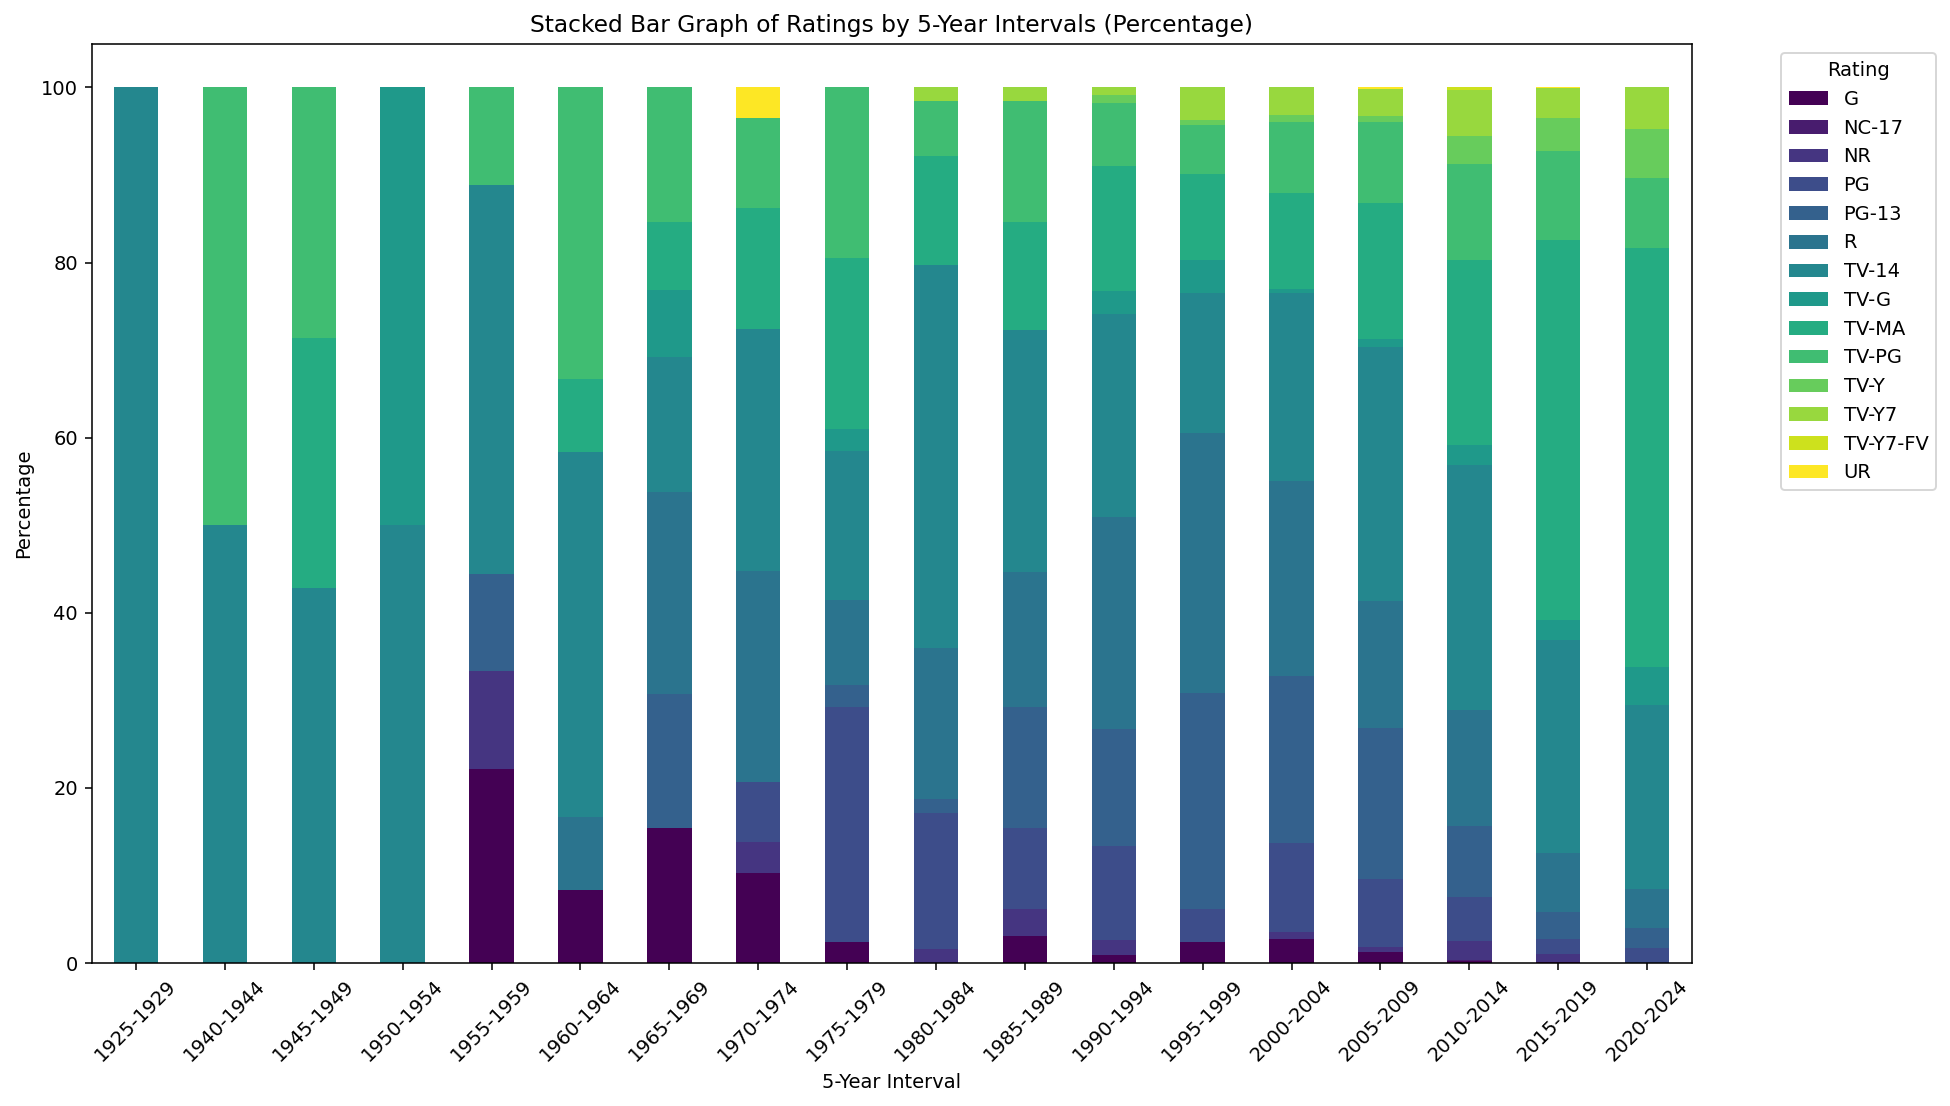

In [706]:
def get_5_year_interval(year):
    return f"{(year // 5) * 5}-{(year // 5) * 5 + 4}"

# Apply function to create a new column for 5-year intervals
nf['5_year_interval'] = nf['release_year'].apply(get_5_year_interval)

# Aggregate counts of ratings by 5-year interval
rating_counts = nf.groupby(['5_year_interval', 'rating']).size().unstack(fill_value=0)

# Calculate percentage of each rating within each 5-year interval
rating_percentages = rating_counts.div(rating_counts.sum(axis=1), axis=0) * 100

# Plotting
ax = rating_percentages.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Stacked Bar Graph of Ratings by 5-Year Intervals (Percentage)')
plt.xlabel('5-Year Interval')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


>> From above graph we can clearly say that:                                                                                   
1925-1959 (early periods): Content was mostly rated as G (General Audience) or similar ratings like TV-G, indicating family-friendly content in these decades. As time progressed, particularly from 1955 to 1959, other ratings such as PG and R began to emerge, showing diversification in movie content.                                                                               
1960-1999: The rise of more diverse content ratings like PG-13, R, and TV ratings (TV-14, TV-MA) occurred. This suggests a growing complexity and variety in content, catering to both general audiences and more mature viewers. Around the 1980s, we see a broader mix of ratings.                                                                                                       
2000s onward: There's a strong presence of TV ratings (TV-MA, TV-14, TV-PG, etc.), possibly due to the rise of television content and streaming services. By the 2010s and 2020s, the chart shows the presence of almost every rating, though some (like NC-17 and NR) are less frequent.

# 4. Recommendation Model 

## Feature Creation 

In [729]:
del nf_rec

In [730]:
nf_rec=nf.drop(['show_id','date_added','duration', 'month','genre','year_added','2_year_interval', '5_year_interval'],axis=1)
nf_rec.columns

Index(['type', 'title', 'director', 'country', 'release_year', 'rating',
       'listed_in'],
      dtype='object')

> Replace unknown directors and countries with null values to prevent them from influencing the recommendation system. Additionally, remove unwanted spaces, hyphens, and ampersands to improve the model's comprehension.

In [731]:
nf_rec['director'] = nf_rec['director'].replace('Not Given', '')
nf_rec['director'] = nf_rec['director'].str.replace(' ', '', regex=False)

nf_rec['country'] = nf_rec['country'].replace('Not Given', '')
nf_rec['country'] = nf_rec['country'].replace(' ', '', regex=False)

nf_rec['rating'] = nf_rec['rating'].str.replace('-', '', regex=False)
nf_rec['rating'] = nf_rec['rating'].str.replace('-', '', regex=False)

nf_rec['type'] = nf_rec['type'].str.replace(' ', '', regex=False)

nf_rec['listed_in'] = nf_rec['listed_in'].str.replace('-', '', regex=False)
nf_rec['listed_in'] = nf_rec['listed_in'].str.replace(' ', '', regex=False)
nf_rec['listed_in'] = nf_rec['listed_in'].str.replace('&', '', regex=False)

>Convert each column to string format, as NLP techniques are more effective with text data rather than a mix of words, numbers, and objects.

In [732]:
nf_rec['type'] = nf_rec['type'].astype(str)
nf_rec['title'] = nf_rec['title'].astype(str)
nf_rec['director'] = nf_rec['director'].astype(str)
nf_rec['country'] = nf_rec['country'].astype(str)
nf_rec['release_year'] = nf_rec['release_year'].astype(str)
nf_rec['rating'] = nf_rec['rating'].astype(str)
nf_rec['listed_in'] = nf_rec['listed_in'].astype(str)

> Clean and standardize text data in a DataFrame by removing unnecessary spaces around commas in specified columns.

In [733]:
import re
def remove_spaces_between_words(country):
    return re.sub(r'\s*,\s*', ',', country)

# Apply the function to 'genres' column
nf_rec[ 'country'] = nf_rec[ 'country'].apply(remove_spaces_between_words)

def remove_spaces_between_words(listed_in):
    return re.sub(r'\s*,\s*', ',', listed_in)

# Apply the function to 'genres' column
nf_rec[ 'listed_in'] = nf_rec[ 'listed_in'].apply(remove_spaces_between_words)

def remove_spaces_between_words(director):
    return re.sub(r'\s*,\s*', ',', director)

# Apply the function to 'genres' column
nf_rec[ 'director'] = nf_rec[ 'director'].apply(remove_spaces_between_words)

def remove_spaces_between_words(type):
    return re.sub(r'\s*,\s*', ',', type)

# Apply the function to 'genres' column
nf_rec[ 'type'] = nf_rec[ 'type'].apply(remove_spaces_between_words)

> Convert Columns to Lists of Words

In [734]:
nf_rec[ 'type']=nf_rec[ 'type'].apply(lambda x:x.split())
nf_rec[ 'director']=nf_rec[ 'director'].apply(lambda x:x.split())
nf_rec['country']=nf_rec['country'].apply(lambda x:x.split())
nf_rec['listed_in']=nf_rec['listed_in'].apply(lambda x:x.split())
nf_rec[ 'release_year']=nf_rec[ 'release_year'].apply(lambda x:x.split())
nf_rec[ 'rating']=nf_rec[ 'rating'].apply(lambda x:x.split())

In [735]:
nf_rec.head(10)

,type,title,director,country,release_year,rating,listed_in
0,[Movie],Dick Johnson Is Dead,[KirstenJohnson],"[United, States]",[2020],[PG13],[Documentaries]
1,[TVShow],Ganglands,[JulienLeclercq],[France],[2021],[TVMA],"[CrimeTVShows,InternationalTVShows,TVActionAdv..."
2,[TVShow],Midnight Mass,[MikeFlanagan],"[United, States]",[2021],[TVMA],"[TVDramas,TVHorror,TVMysteries]"
3,[Movie],Confessions of an Invisible Girl,[BrunoGarotti],[Brazil],[2021],[TVPG],"[ChildrenFamilyMovies,Comedies]"
4,[Movie],Sankofa,[HaileGerima],"[United, States]",[1993],[TVMA],"[Dramas,IndependentMovies,InternationalMovies]"
5,[TVShow],The Great British Baking Show,[AndyDevonshire],"[United, Kingdom]",[2021],[TV14],"[BritishTVShows,RealityTV]"
6,[Movie],The Starling,[TheodoreMelfi],"[United, States]",[2021],[PG13],"[Comedies,Dramas]"
7,[Movie],Motu Patlu in the Game of Zones,[SuhasKadav],[India],[2019],[TVY7],"[ChildrenFamilyMovies,Comedies,MusicMusicals]"
8,[Movie],Je Suis Karl,[ChristianSchwochow],[Germany],[2021],[TVMA],"[Dramas,InternationalMovies]"
9,[Movie],Motu Patlu in Wonderland,[SuhasKadav],[India],[2013],[TVY7],"[ChildrenFamilyMovies,MusicMusicals]"


> Making a feature named as 'tag' which is the combination of all the nesesary features

In [736]:
nf_rec['tag']=nf_rec['type'] + nf_rec[ 'director'] + nf_rec[ 'country'] + nf_rec[ 'release_year'] + nf_rec[ 'rating'] + nf_rec[ 'listed_in']

In [737]:
# Removing unnecessary columns
nf_recommend=nf_rec.drop(['type','director','country','release_year','rating','listed_in'],axis=1)
nf_recommend.head(3)

,title,tag
0,Dick Johnson Is Dead,"[Movie, KirstenJohnson, United, States, 2020, ..."
1,Ganglands,"[TVShow, JulienLeclercq, France, 2021, TVMA, C..."
2,Midnight Mass,"[TVShow, MikeFlanagan, United, States, 2021, T..."


In [738]:
nf_recommend['tag']=nf_recommend['tag'].apply(lambda x:" ".join(x))

In [739]:
nf_recommend['tag']=nf_recommend['tag'].apply(lambda x:x.lower())
nf_recommend.head(3)

,title,tag
0,Dick Johnson Is Dead,movie kirstenjohnson united states 2020 pg13 d...
1,Ganglands,tvshow julienleclercq france 2021 tvma crimetv...
2,Midnight Mass,tvshow mikeflanagan united states 2021 tvma tv...


> We are not performing stemming on the words because our feature (tag) is a combination of multiple elements: type, director, country, year of release, and genre. Since these features represent distinct and meaningful categories or attributes rather than individual words that need to be reduced to their root forms, stemming would not be appropriate or beneficial in this context. Instead, maintaining the original terms helps preserve the specific context and relevance of each attribute within the feature.

## Creating a Recommendation systrm using CountVectorizer 

> CountVectorizer is a tool from the scikit-learn library used for text preprocessing in natural language processing (NLP). It converts a collection of text documents into a matrix of token counts.

In [740]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=300000, stop_words='english')

In [741]:
vector=cv.fit_transform(nf_recommend['tag']).toarray()

>Computes and retrieves the most similar vectors to the first vector in a set, based on cosine similarity

In [742]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vector)
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

[(1715, 0.8571428571428569),
 (7308, 0.8451542547285165),
 (7265, 0.7715167498104596),
 (1393, 0.7559289460184543),
 (1914, 0.7559289460184543)]

>Function recommend is designed to recommend similar movies or TV shows based on a given title

In [746]:
def Recommend_CV(Movies_TV_Shows):
    Index= nf_recommend[nf_recommend['title']==Movies_TV_Shows].index[0]
    dist=similarity[Index]
    List=sorted(list(enumerate(dist)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in List:
        print(nf_recommend.iloc[i[0]].title)

>>Similarity Calculation: The recommendations are based on the cosine similarity between "Inception" and other movies in the dataset. Cosine similarity measures how similar the vector representation of "Inception" is to the vectors of other movies.    
Top Recommendations: The movies listed as recommendations are those that have the highest cosine similarity scores with "Inception". This means these movies are considered the most similar to "Inception" based on the features used to compute the similarity (such as genre, director, and other metadata).

In [747]:
Recommend_CV("Inception")

The Master
There Will Be Blood
Boogie Nights
American Beauty
Malcolm & Marie


## Creating a recommendation system using Word2Vec 

In [748]:
# Tokenization and Cleaning
def preprocess_text(text):
    tokens = word_tokenize(text)  # Tokenize
    return tokens

nf_recommend['tokens'] = nf_recommend['tag'].apply(preprocess_text)

In [749]:
model = Word2Vec(sentences=nf_recommend['tokens'], vector_size=100, window=5, min_count=1, sg=0)

# Save model for later use
model.save("word2vec_model.model")

# Function to get the vector for a given title
def get_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Compute vectors for all titles
nf_recommend['vector'] = nf_recommend['tokens'].apply(lambda tokens: get_vector(tokens, model))

# Function to compute similarities
def compute_similarities(vector, vectors):
    return cosine_similarity([vector], vectors)[0]

# Recommendation function
def recommendm(title):
    # Ensure the input movie exists
    if title not in nf_recommend['title'].values:
        return f"Movie title '{title}' not found in the dataset."

    # Find the index of the given movie
    index = nf_recommend[nf_recommend['title'] == title].index[0]
    target_vector = nf_recommend.loc[index, 'vector']

    # Compute similarities
    similarities = compute_similarities(target_vector, np.stack(nf_recommend['vector']))

    # Get top 5 recommendations excluding the input title
    top_indices = sorted(range(len(similarities)), key=lambda i: similarities[i], reverse=True)
    top_indices = [i for i in top_indices if i != index][1:6]

    # Retrieve and return recommended titles
    recommended_titles = nf_recommend.iloc[top_indices]['title'].tolist()
    return recommended_titles

# Main interaction with the user
def main():
    movie_name = input("Enter a Movie/TV Show name to get recommendations: ")
    recommendations = recommendm(movie_name)
    
    if isinstance(recommendations, str):
        print(recommendations)
    else:
        print("Recommended titles:")
        for title in recommendations:
            print(title)

# Run the main function to interact with the user
if __name__ == "__main__":
    main()

Enter a Movie/TV Show name to get recommendations: Inception
Recommended titles:
9
Legion
Underworld: Rise of the Lycans
Cirque du Freak: The Vampire's Assistant
Cloverfield


# Comparing which one perform better

> Recommendation via CountVectorizer compiled with Cosine Similarity when we asked to recommend based on Movie Inception
1. The Master
2. There Will Be Blood
3. Boogie Nights
4. American Beauty
5. Malcolm & Marie

>Recommendation via Word2Vec compiled with Cosine Similarity when we asked to recommend based on Movie Inception
1. 9
2. Legion
3. Underworld: Rise of the Lycans
4. Cirque du Freak: The Vampire's Assistant
5. Cloverfield

In [765]:
import pandas as pd
nf_1=nf

def select_columns_based_on_titles(nf_1, titles):
    # Filter the DataFrame by titles
    nf_1 = nf[nf['title'].isin(titles)]
    
    # Select specific columns to display
    selected_columns = nf_1[['type', 'title', 'director', 'country', 'release_year','rating', 'listed_in']]
    
    return selected_columns

# Example usage
titles_CV = ['Inception','The Master','There Will Be Blood','Boogie Nights','American Beauty','Malcolm & Marie']
titles_W2V = ['Inception','9','Legion','Underworld: Rise of the Lycans',"Cirque du Freak: The Vampire's Assistant",'Cloverfield']
result_CV = select_columns_based_on_titles(nf_1, titles_CV)
result_W2V = select_columns_based_on_titles(nf_1, titles_W2V)

In [766]:
print(result_CV)

       type                title              director        country  \
478   Movie            Inception     Christopher Nolan  United States   
715   Movie        Boogie Nights  Paul Thomas Anderson  United States   
1056  Movie           The Master  Paul Thomas Anderson  United States   
1255  Movie      Malcolm & Marie          Sam Levinson  United States   
2282  Movie  There Will Be Blood  Paul Thomas Anderson  United States   
4407  Movie      American Beauty            Sam Mendes  United States   

      release_year rating                                        listed_in  
478           2010  PG-13  Action & Adventure, Sci-Fi & Fantasy, Thrillers  
715           1997      R             Comedies, Dramas, Independent Movies  
1056          2012      R                       Dramas, Independent Movies  
1255          2021      R                       Dramas, Independent Movies  
2282          2007      R                       Dramas, Independent Movies  
4407          1999      R 

In [767]:
print(result_W2V)

       type                                     title            director  \
478   Movie                                 Inception   Christopher Nolan   
760   Movie            Underworld: Rise of the Lycans  Patrick Tatopoulos   
4254  Movie                                         9         Shane Acker   
4690  Movie  Cirque du Freak: The Vampire's Assistant          Paul Weitz   
4703  Movie                               Cloverfield         Matt Reeves   
5315  Movie                                    Legion       Scott Stewart   

            country  release_year rating  \
478   United States          2010  PG-13   
760   United States          2009      R   
4254  United States          2009  PG-13   
4690  United States          2009  PG-13   
4703  United States          2008  PG-13   
5315  United States          2010      R   

                                              listed_in  
478     Action & Adventure, Sci-Fi & Fantasy, Thrillers  
760   Action & Adventure, Horror Mo

>Inception is a movie from the United States, and the recommendations from both methods reflect this origin.

>CountVectorizer Method: The recommended movies span a release range from 1997 to 2021. This range is quite broad compared to the release date of Inception (2010). Additionally, the movies recommended by this method have a predominant rating of R (Restricted; under 17 requires accompanying parent or adult guardian), which differs from Inception's PG-13 rating (Parents strongly cautioned; some material may be inappropriate for children under 13). The genres recommended by the CountVectorizer method, including Comedies, Dramas, and Independent Movies, do not align with Inception's genres of Action & Adventure, Sci-Fi & Fantasy, and Thrillers.

>Word2Vec Method: The recommended movies have a release range of 2008 to 2010, which aligns more closely with Inception's release date. This method also yields a better alignment in terms of rating, with 3 out of 5 recommended movies rated PG-13, capturing a more similar semantic meaning to Inception. Furthermore, the Word2Vec method suggests movies within the same genres as Inception, including Action & Adventure, Sci-Fi & Fantasy, and Thrillers, demonstrating a stronger alignment with Inception's genre classification.

## Write a Movie name or TV Show name to get Recommendation 

In [769]:
def main():
    movie_name = input("Enter a Movie/TV Show name to get recommendations: ")
    recommendations = recommendm(movie_name)
    
    if isinstance(recommendations, str):
        print(recommendations)
    else:
        print("Recommended titles:")
        for title in recommendations:
            print(title)

# Run the main function to interact with the user
if __name__ == "__main__":
    main()

Enter a Movie/TV Show name to get recommendations: Inception
Recommended titles:
9
Legion
Underworld: Rise of the Lycans
Cirque du Freak: The Vampire's Assistant
Cloverfield
